# New York City Taxi Trip Duration

Share code and data to improve ride time predictions

---

## Contents

#### 1. EDA
    A. Data Check
    B. Correlation
  

#### 2. Rough modeling
    A. Summary
    B. 잔차 정규성 검정
    C. Residual-feature 관계 검정
    D. 이분산 검정
    E. 자기상관 검정
    F. Target-feature check
  

#### 3. Optimal regulization

    A. Dist setting
    B. Dist optimzation
    C. Choose


#### 4. Modeling

    A. Model 비교
    B. 결과 진단

#### 5. Cross validation
    A. Basic model
    B. Outlier 1회
    
#### 6. Kaggle submit

    A.Submit
    B.결과


---

In [1]:
from taxi_pakage import *

/usr/local/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


---

# 1. EDA

## A. Data check

### a. Data set

In [2]:
# data set
taxi = pd.read_csv('train.csv')
taxi.tail()

id  vendor_id      pickup_datetime     dropoff_datetime  \
1458639  id2376096          2  2016-04-08 13:31:04  2016-04-08 13:44:02   
1458640  id1049543          1  2016-01-10 07:35:15  2016-01-10 07:46:10   
1458641  id2304944          2  2016-04-22 06:57:41  2016-04-22 07:10:25   
1458642  id2714485          1  2016-01-05 15:56:26  2016-01-05 16:02:39   
1458643  id1209952          1  2016-04-05 14:44:25  2016-04-05 14:47:43   

         passenger_count  pickup_longitude  pickup_latitude  \
1458639                4        -73.982201        40.745522   
1458640                1        -74.000946        40.747379   
1458641                1        -73.959129        40.768799   
1458642                1        -73.982079        40.749062   
1458643                1        -73.979538        40.781750   

         dropoff_longitude  dropoff_latitude store_and_fwd_flag  trip_duration  
1458639         -73.994911         40.740170                  N            778  
1458640         -73.970184         40.796547                  N            655  
1458641         -74.004433         40.707371                  N            764  
1458642         -73.974632         40.757107                  N            373  
1458643         -73.972809         40.790585                  N            198

In [3]:
# 데이터 크기
taxi.shape # 1,458,644개 데이터, 11개의 컬럼으로 구성

(1458644, 11)

In [4]:
# 데이터에 대한 정보 (컬럼 개수, null값 여부, 데이터 유형)
taxi.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
id                    1458644 non-null object
vendor_id             1458644 non-null int64
pickup_datetime       1458644 non-null object
dropoff_datetime      1458644 non-null object
passenger_count       1458644 non-null int64
pickup_longitude      1458644 non-null float64
pickup_latitude       1458644 non-null float64
dropoff_longitude     1458644 non-null float64
dropoff_latitude      1458644 non-null float64
store_and_fwd_flag    1458644 non-null object
trip_duration         1458644 non-null int64
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


- object : id, pickup_datetime, dropoff_datetime, store_and_fwd_flag
- int : vendor_id, passenger_count, trip_duration
- float : pickup_logitude, pickup_latitude, dropoff_logitude, dropoff_latitude

| Values | Meaning |
|-|-|
|id | a unique identifier for each trip |
|vendor_id | a code indicating the provider associated with the trip record |
|pickup_datetime|date and time when the meter was engaged |
|dropoff_datetime|date and time when the meter was disengaged|
|passenger_count|the number of passengers in the vehicle (driver entered value)|
|pickup_longitude|the longitude where the meter was engaged|
|pickup_latitude| the latitude where the meter was engaged|
|dropoff_longitude| the longitude where the meter was disngaged|
|dropoff_latitude| the latitude where the meter was disengaged|
|store_and_fwd_flag|This indicates whether the trip record was held in vehicle memory |
|trip_duration|duration of the trip in seconds|

In [5]:
# Descriptive statistics
pd.set_option('display.float_format', lambda x: '%.3f' % x)
taxi.describe()

vendor_id  passenger_count  pickup_longitude  pickup_latitude  \
count 1458644.000      1458644.000       1458644.000      1458644.000   
mean        1.535            1.665           -73.973           40.751   
std         0.499            1.314             0.071            0.033   
min         1.000            0.000          -121.933           34.360   
25%         1.000            1.000           -73.992           40.737   
50%         2.000            1.000           -73.982           40.754   
75%         2.000            2.000           -73.967           40.768   
max         2.000            9.000           -61.336           51.881   

       dropoff_longitude  dropoff_latitude  trip_duration  
count        1458644.000       1458644.000    1458644.000  
mean             -73.973            40.752        959.492  
std                0.071             0.036       5237.432  
min             -121.933            32.181          1.000  
25%              -73.991            40.736        397.000  
50%              -73.980            40.755        662.000  
75%              -73.963            40.770       1075.000  
max              -61.336            43.921    3526282.000

### b. 독립 변수
( vendor_id / passenger_count / store_and_fwd_flag )

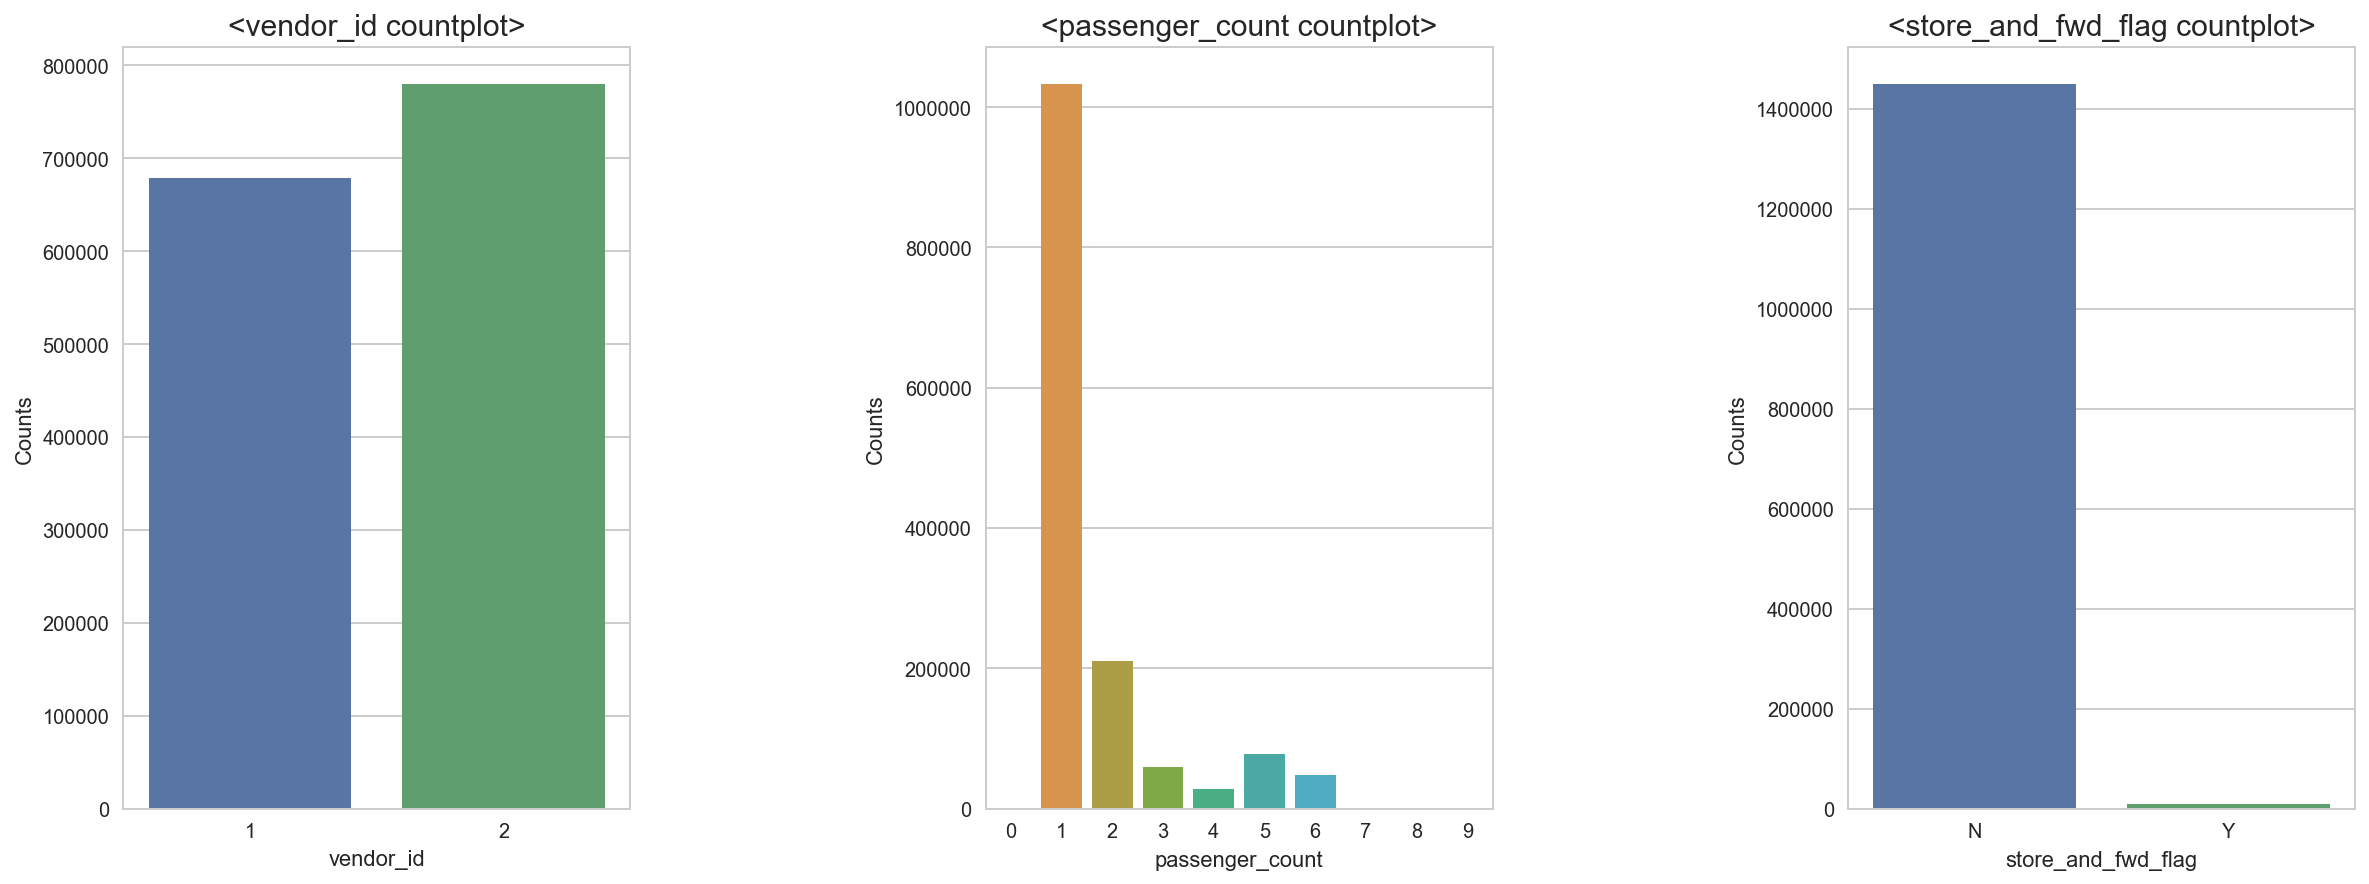

In [6]:
# countplot
plt.figure(figsize=(20, 7))
plt.subplots_adjust(wspace = 0.7)

# vendor_id
plt.subplot(131)
sns.countplot(x = 'vendor_id', data = taxi)
plt.title('<vendor_id countplot>', fontsize = 15)
plt.xlabel('vendor_id')
plt.ylabel('Counts')

# passenger_count
plt.subplot(132)
sns.countplot(x = 'passenger_count', data = taxi)
plt.title('<passenger_count countplot>', fontsize = 15)
plt.xlabel('passenger_count')
plt.ylabel('Counts')

# store_and_fwd_flag
plt.subplot(133)
sns.countplot(x = 'store_and_fwd_flag', data = taxi)
plt.title('<store_and_fwd_flag countplot>', fontsize = 15)
plt.xlabel('store_and_fwd_flag')
plt.ylabel('Counts')

plt.show()

### c. location
( pickup_longitude / pickup_latitude / dropoff_longitude / dropoff_latitude )

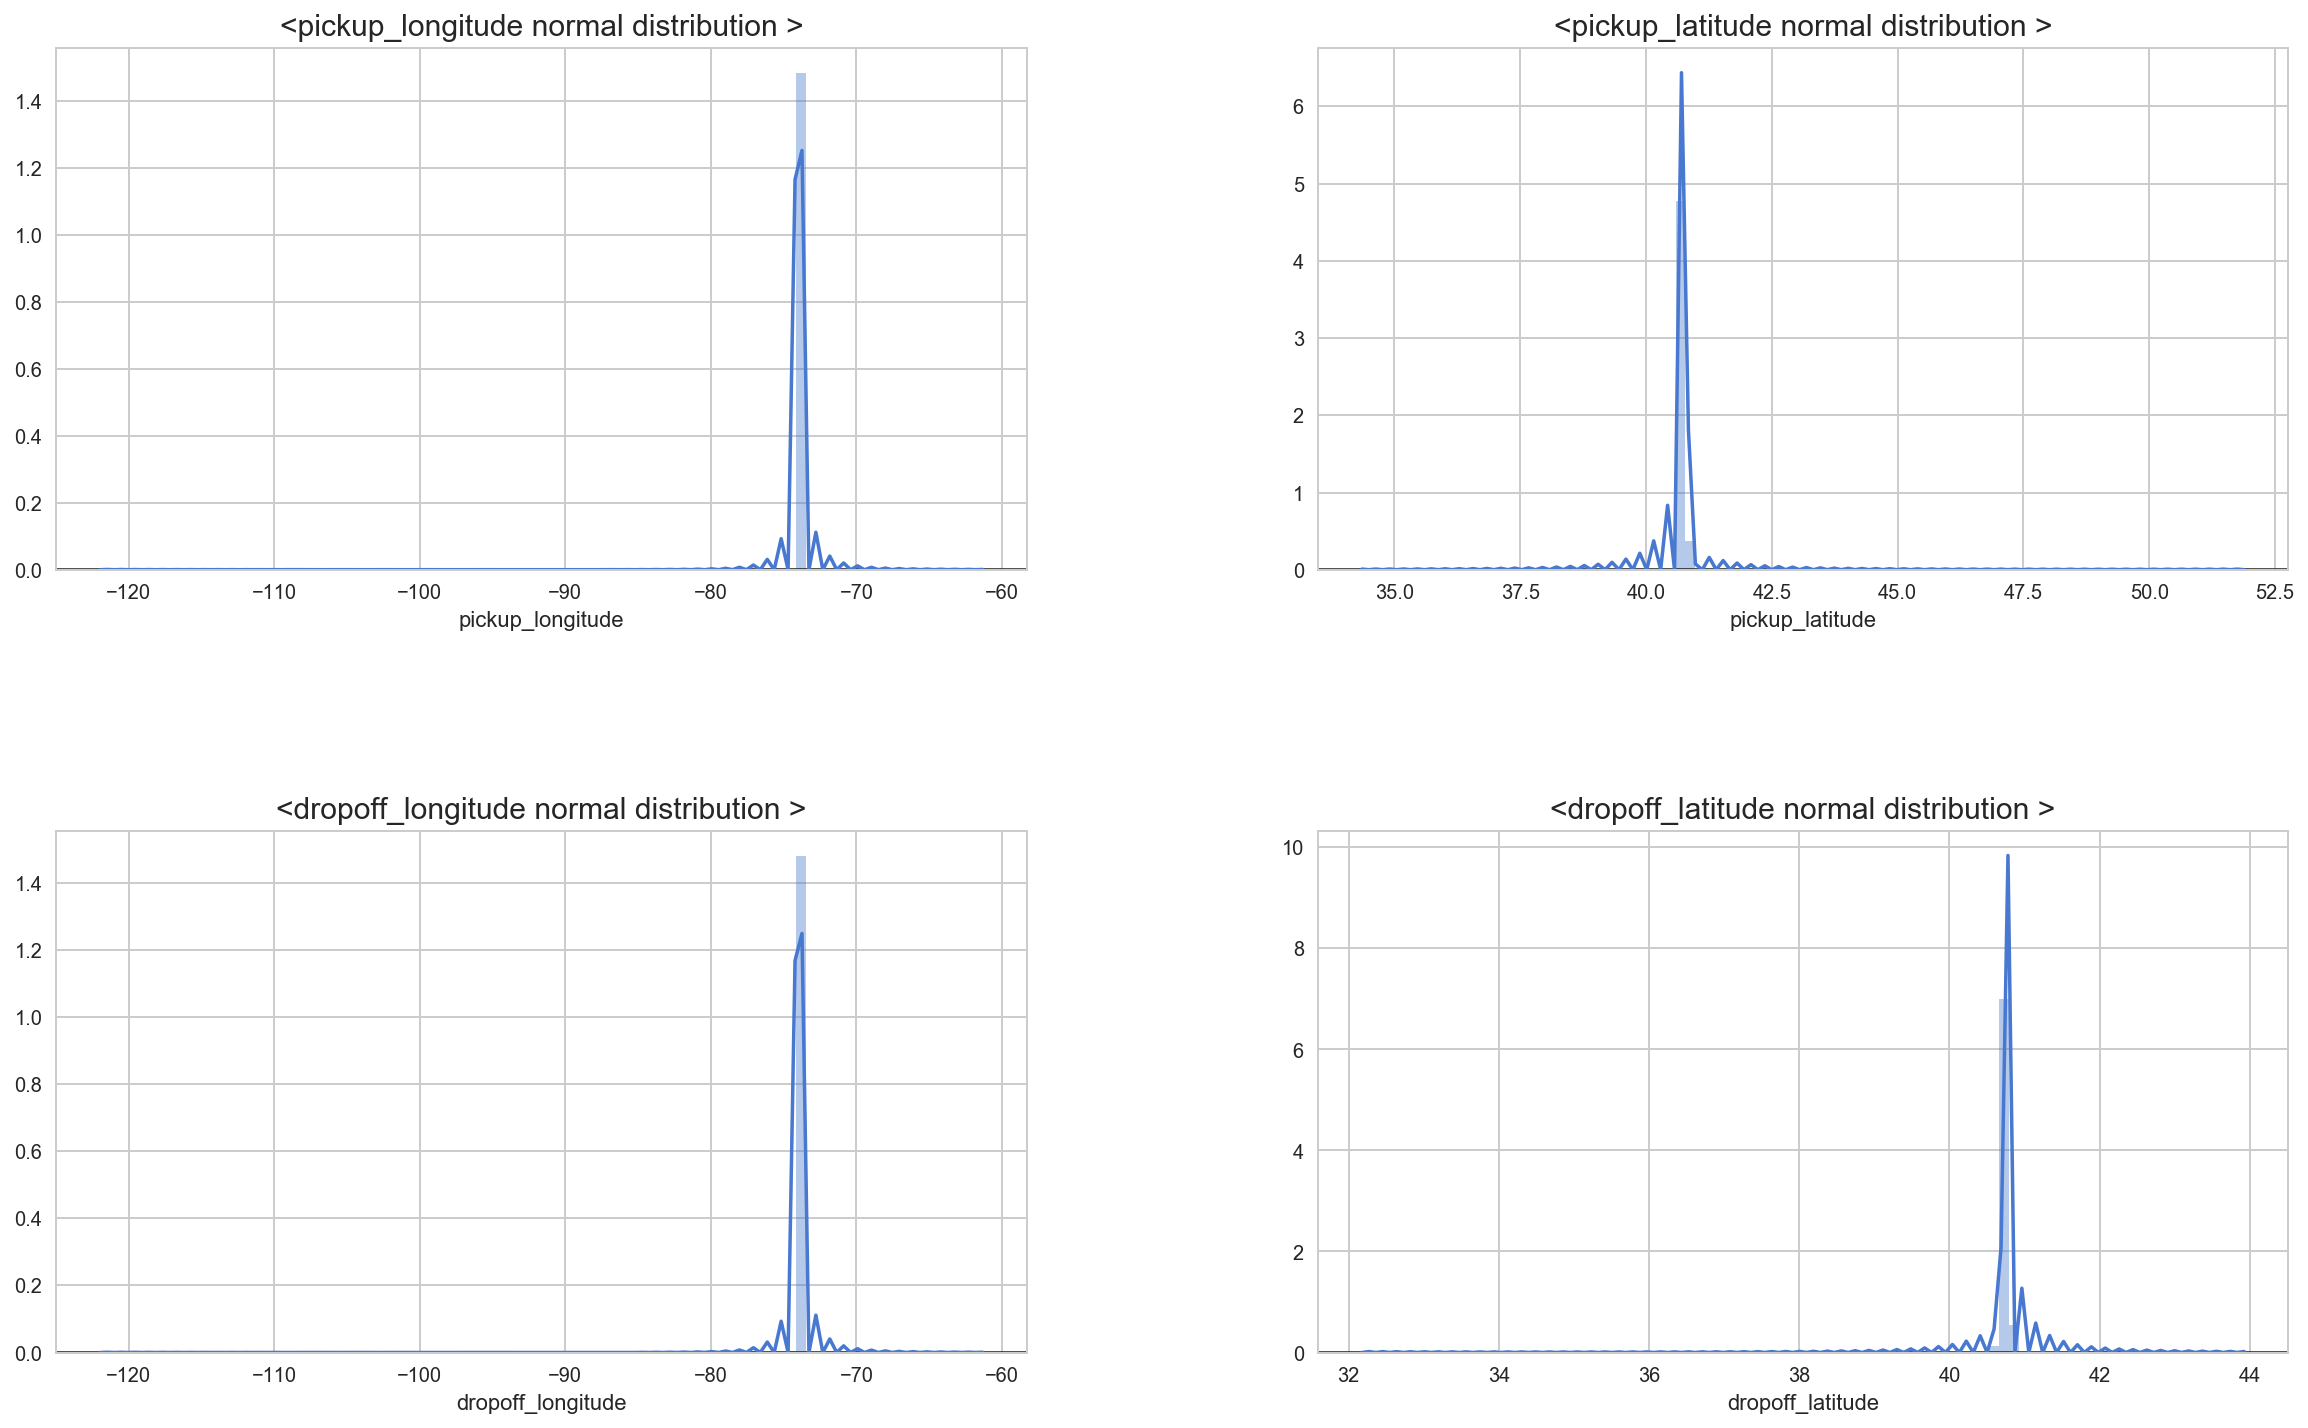

In [7]:
# normal distribution
plt.figure(figsize=(20, 12))
plt.subplots_adjust(hspace = 0.5, wspace = 0.3)

for i in range(5, 8+1):
    plt.subplot(2,2,i-4)
    plt.title("<{} normal distribution >".format(taxi.columns[i]), fontsize = 15)
    plt.axhline(y=0, c='k')
    sns.distplot(taxi[taxi.columns[i]], axlabel = taxi.columns[i], bins = 90, color = "b")
    
plt.show()

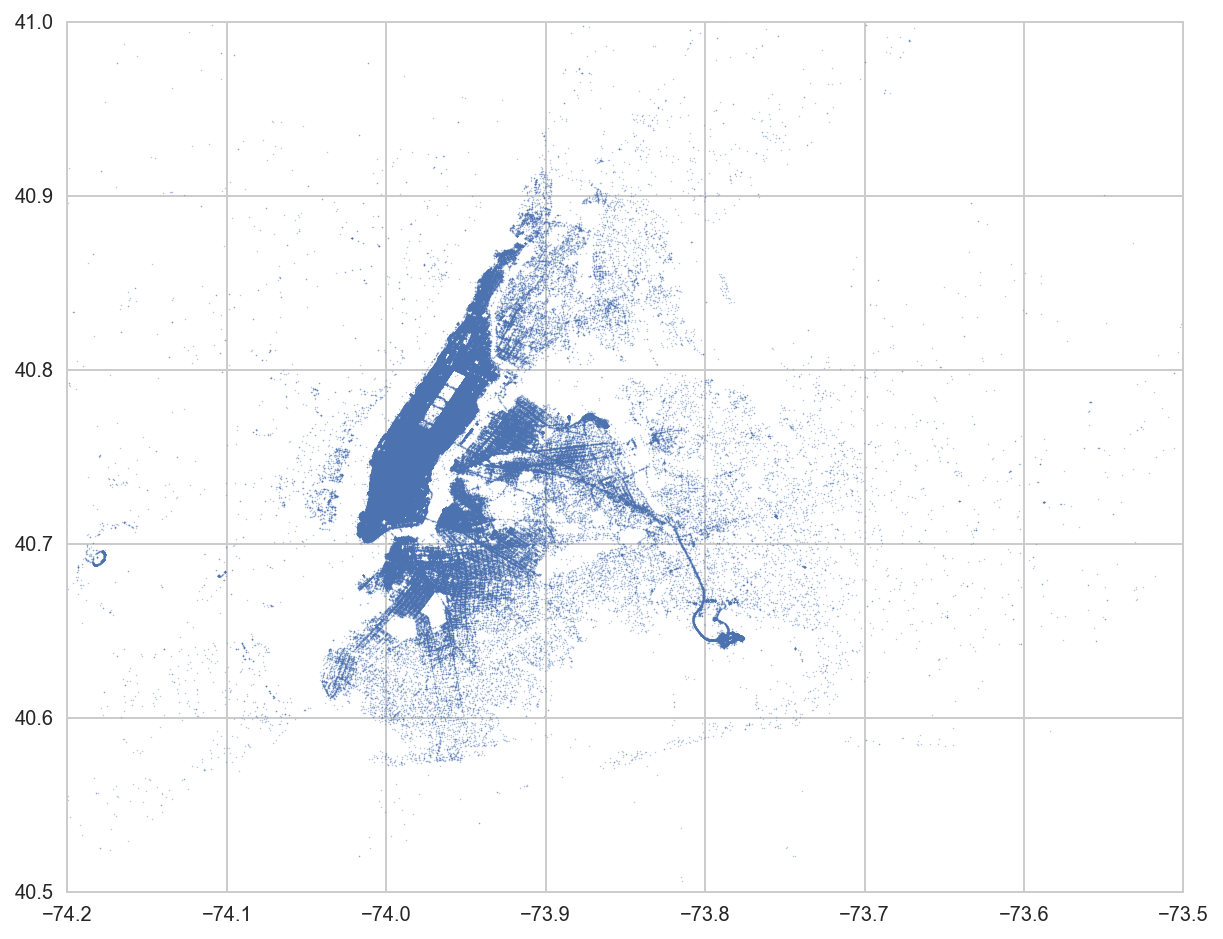

In [8]:
# 좌표 표시
longitude = list(taxi['pickup_longitude']) + list(taxi['dropoff_longitude'])
latitude = list(taxi['pickup_latitude']) + list(taxi['dropoff_latitude'])
plt.figure(figsize = (10, 8))
plt.xlim(-74.2, -73.5)
plt.ylim(40.5, 41)
plt.plot(longitude, latitude, '.', alpha = 0.4, markersize = 1.5)
plt.show()

### c. 종속 변수

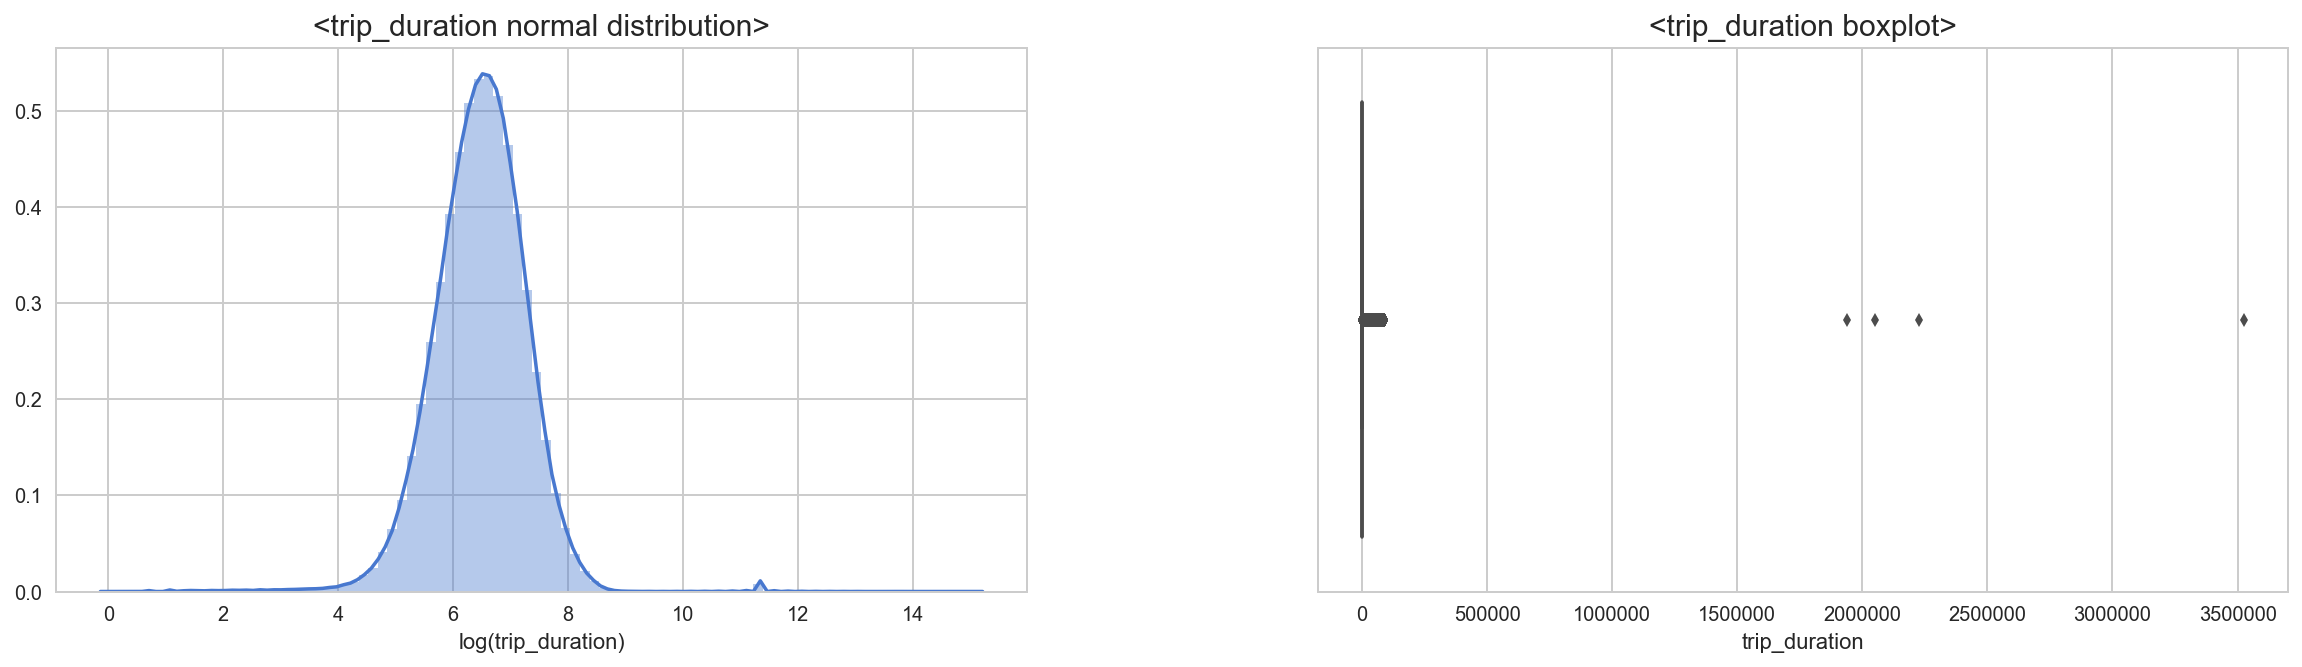

In [9]:
# trip_duration
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.3)

plt.subplot(121)
plt.title("<trip_duration normal distribution>", fontsize = 15)
sns.distplot(np.log(taxi["trip_duration"]).values, 
             axlabel = "log(trip_duration)", label = "trip_duration", bins = 90, color = "b")

plt.subplot(122)
sns.boxplot(x = 'trip_duration', data = taxi)
plt.title('<trip_duration boxplot>', fontsize = 15)
plt.xlabel('trip_duration')

plt.show()

### d. 이상치 제거

In [10]:
# 이상치 체크
taxi[taxi['trip_duration'] > 1500000]

id  vendor_id      pickup_datetime     dropoff_datetime  \
355003  id1864733          1  2016-01-05 00:19:42  2016-01-27 11:08:38   
680594  id0369307          1  2016-02-13 22:38:00  2016-03-08 15:57:38   
924150  id1325766          1  2016-01-05 06:14:15  2016-01-31 01:01:07   
978383  id0053347          1  2016-02-13 22:46:52  2016-03-25 18:18:14   

        passenger_count  pickup_longitude  pickup_latitude  dropoff_longitude  \
355003                1           -73.790           40.644            -73.957   
680594                2           -73.922           40.735            -73.985   
924150                1           -73.984           40.742            -73.985   
978383                1           -73.784           40.649            -73.978   

        dropoff_latitude store_and_fwd_flag  trip_duration  
355003            40.773                  N        1939736  
680594            40.760                  N        2049578  
924150            40.728                  N        2227612  
978383            40.750                  N        3526282

In [11]:
# Trip_duration에서 나타난 4개의 이상치 제거
taxi = taxi[taxi['trip_duration'] < 1500000].reset_index(drop=True)

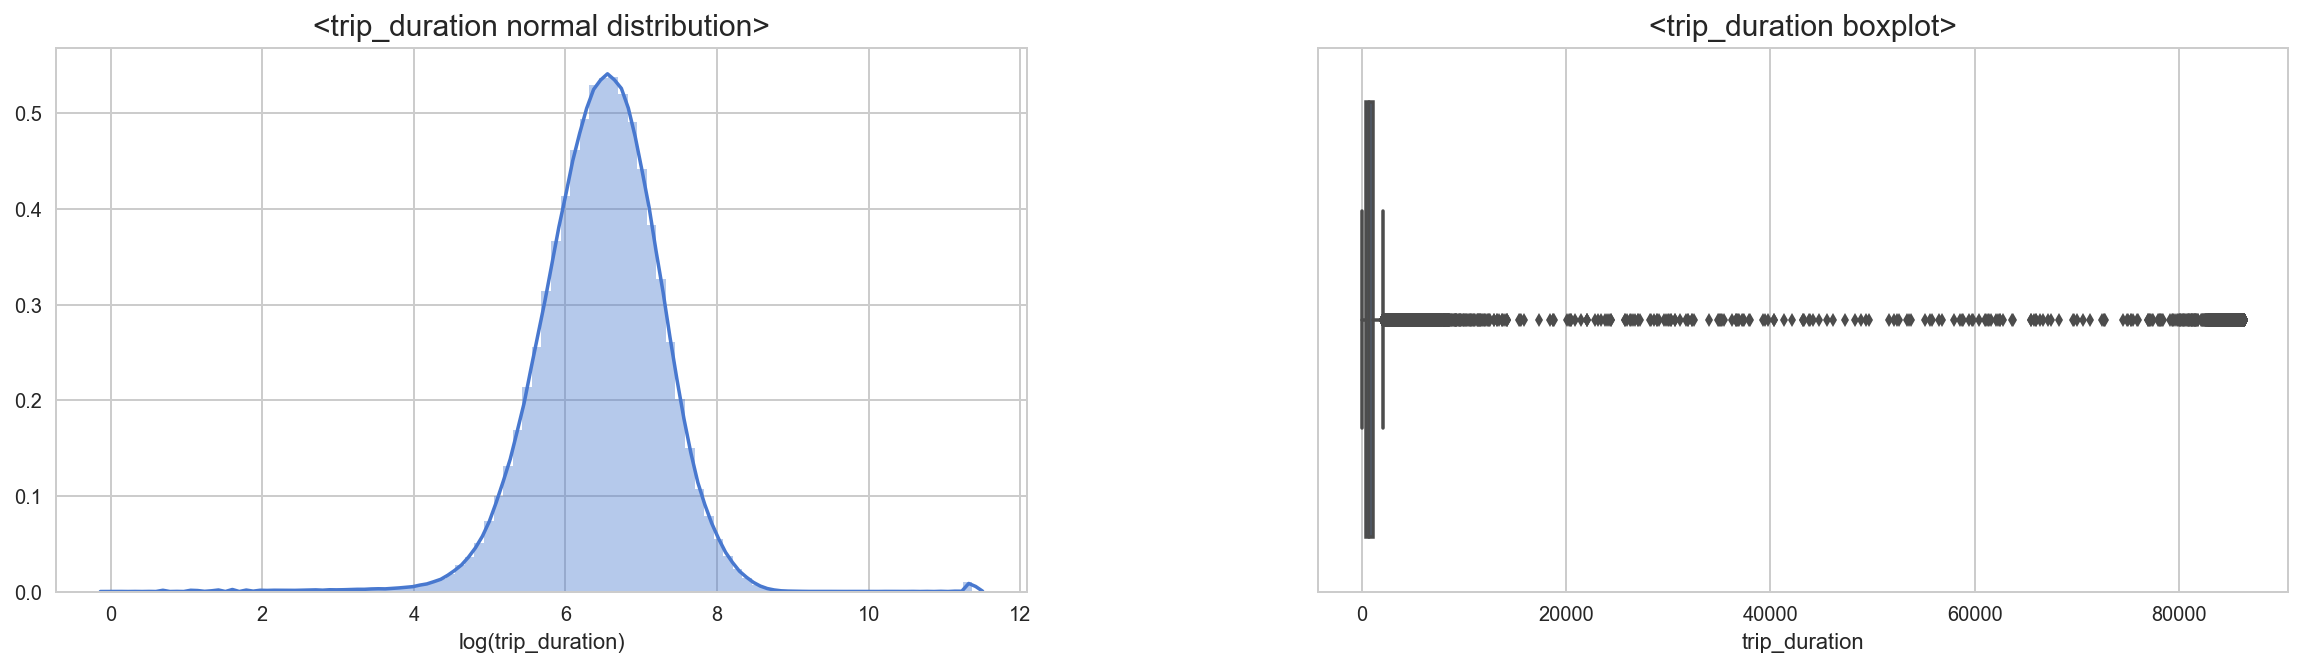

In [12]:
# trip_duration
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.3)

plt.subplot(121)
plt.title("<trip_duration normal distribution>", fontsize = 15)
sns.distplot(np.log(taxi["trip_duration"]).values, 
             axlabel = "log(trip_duration)", label = "trip_duration", bins = 90, color = "b")

plt.subplot(122)
sns.boxplot(x = 'trip_duration', data = taxi)
plt.title('<trip_duration boxplot>', fontsize = 15)
plt.xlabel('trip_duration')

plt.show()

### e. Edit data

In [13]:
# store_and_fwd_flag -  N, Y 를 0, 1 숫자로 변경
taxi['store_and_fwd_flag'] = taxi['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)

# pickup_datetime, dropoff_datetime 형식 바꿈 (2016.01.01 기준)
taxi['pickup_datetime'] = taxi['pickup_datetime'].apply(strptime)

# id 숫자형
taxi['id'] = taxi['id'].apply(lambda x : int(x[2:]))

### f. Add data

In [14]:
# 좌표를 이용해 직선 거리 생성
taxi['dist'] = haversine_np(taxi['pickup_longitude'], taxi['pickup_latitude'], 
                            taxi['dropoff_longitude'], taxi['dropoff_latitude'])

# date 숫자화
taxi['pick_date'] = taxi['pickup_datetime'].apply(date_to_zero)
taxi['pick_time'] = taxi['pickup_datetime'].apply(time_to_zero)
taxi["pickup_datetime"] = pd.to_datetime(taxi["pickup_datetime"]) 
taxi["month"] = taxi["pickup_datetime"].dt.month 
taxi["hour"] = taxi["pickup_datetime"].dt.hour
taxi["weekday"] = taxi["pickup_datetime"].apply(week_num) # 요일 (1:월, 2:화, 3:수, 4:목, 5:금, 6:토, 7:일)
taxi['holiday'] = taxi['pickup_datetime'].apply(holiday) # 휴일 (1:휴일, 0:평일)

**( extreme_weather data 추가 입력**, [출처 : https://www.weather.gov/okx/stormevents] **)**

In [15]:
weather_event = ['20160110', '20160113', '20160117', '20160123', '20160205', '20160208', '20160215', '20160216',
                 '20160224', '20160225', '20160314', '20160315', '20160328', '20160329', '20160403', '20160404',
                 '20160530', '20160628']

# 날씨 데이터 생성 
weather_event = pd.Series(pd.to_datetime(weather_event, format = '%Y%m%d')).dt.date
weather_event = weather_event.astype('<U32')
weather_event = list(weather_event)

taxi["y-m-d"] = pd.to_datetime(taxi["pickup_datetime"]).apply(lambda x: x.strftime("%Y-%m-%d"))
taxi["extreme_weather"] = taxi["y-m-d"].apply(lambda x: 1 if x in weather_event else 0)
taxi["weather_event"] = taxi["extreme_weather"] # 날씨 (1:자연재해,  0:자연재해X)

### g. Setting

In [16]:
# 최종 데이터
# 차후 분석을 위해 연속형 데이터, 카테고리 데이터, y(trip_duration)순으로 재배치
c_1 = taxi['vendor_id']
c_2 = taxi['passenger_count']
c_3 = taxi['store_and_fwd_flag']
c_4 = taxi['month']
c_5 = taxi['hour']
c_6 = taxi['weekday']
c_7 = taxi['holiday']
c_8 = taxi['weather_event']
y = taxi['trip_duration'] 

taxi = taxi.drop(['vendor_id', 'pickup_datetime', 'dropoff_datetime', 'passenger_count' , 'store_and_fwd_flag',  'trip_duration', 'month', 'hour', 'weekday', 'holiday', 'y-m-d', 'extreme_weather', 'weather_event'], axis = 1)

taxi['vendor_id'] = c_1
taxi['passenger_count'] = c_2
taxi['store_and_fwd_flag'] = c_3 
taxi['month'] = c_4 
taxi['hour'] = c_5 
taxi['weekday'] = c_6 
taxi['holiday'] = c_7 
taxi['weather_event'] = c_8
taxi['trip_duration'] = y
taxi.tail()

id  pickup_longitude  pickup_latitude  dropoff_longitude  \
1458635  2376096           -73.982           40.746            -73.995   
1458636  1049543           -74.001           40.747            -73.970   
1458637  2304944           -73.959           40.769            -74.004   
1458638  2714485           -73.982           40.749            -73.975   
1458639  1209952           -73.980           40.782            -73.973   

         dropoff_latitude  dist  pick_date  pick_time  vendor_id  \
1458635            40.740 1.224         98      48663          2   
1458636            40.797 6.046          9      27314          1   
1458637            40.707 7.820        112      25060          2   
1458638            40.757 1.092          4      57385          1   
1458639            40.791 1.133         95      53064          1   

         passenger_count  store_and_fwd_flag  month  hour  weekday  holiday  \
1458635                4                   0      4    13        5        0   
1458636                1                   0      1     7        7        0   
1458637                1                   0      4     6        5        0   
1458638                1                   0      1    15        2        0   
1458639                1                   0      4    14        2        0   

         weather_event  trip_duration  
1458635              0            778  
1458636              1            655  
1458637              0            764  
1458638              0            373  
1458639              0            198

### h. New data EDA

#### ( month / hour / weekday / holiday / weather_event )

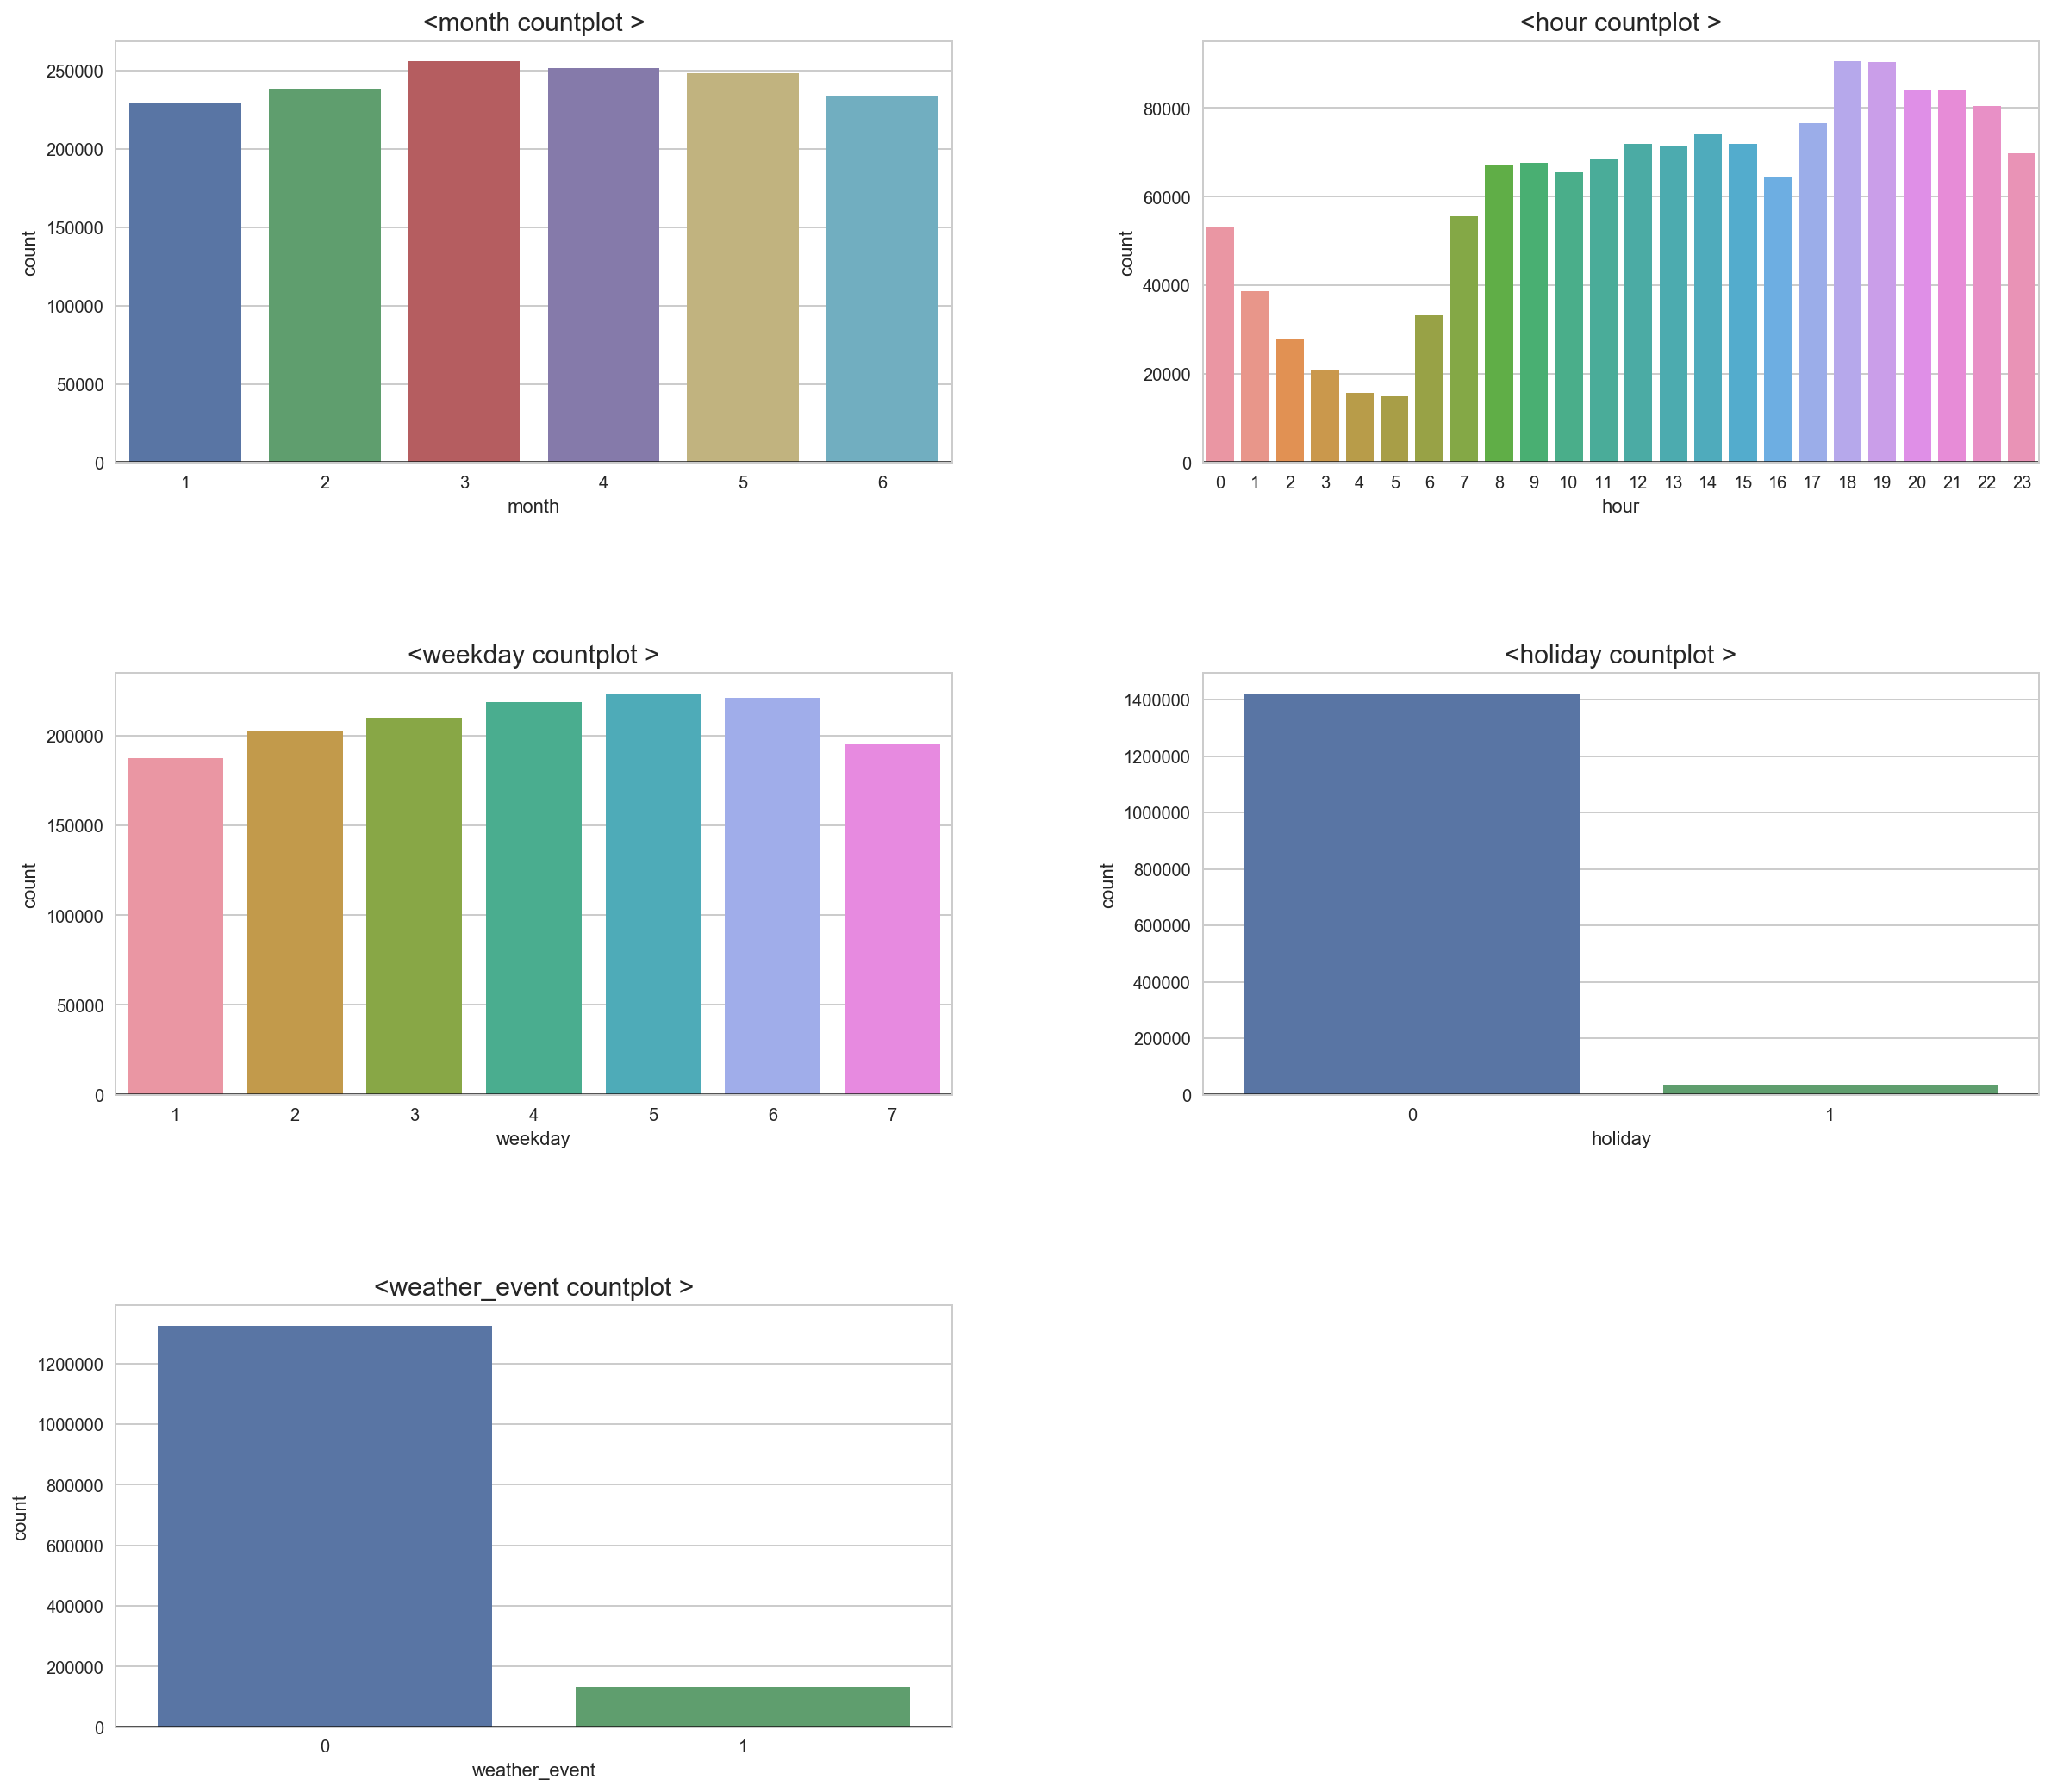

In [17]:
plt.figure(figsize=(20, 18))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i in range(11, 15+1):
    plt.subplot(3,2,i-10)
    plt.title("<{} countplot >".format(taxi.columns[i]), fontsize = 15)
    plt.axhline(y=0, c='k')
    plt.xlabel(taxi.columns[i])
    plt.ylabel('Counts')
    sns.countplot(taxi[taxi.columns[i]], data = taxi)
    
plt.show()

#### ( dist / pick_time / pick_date )

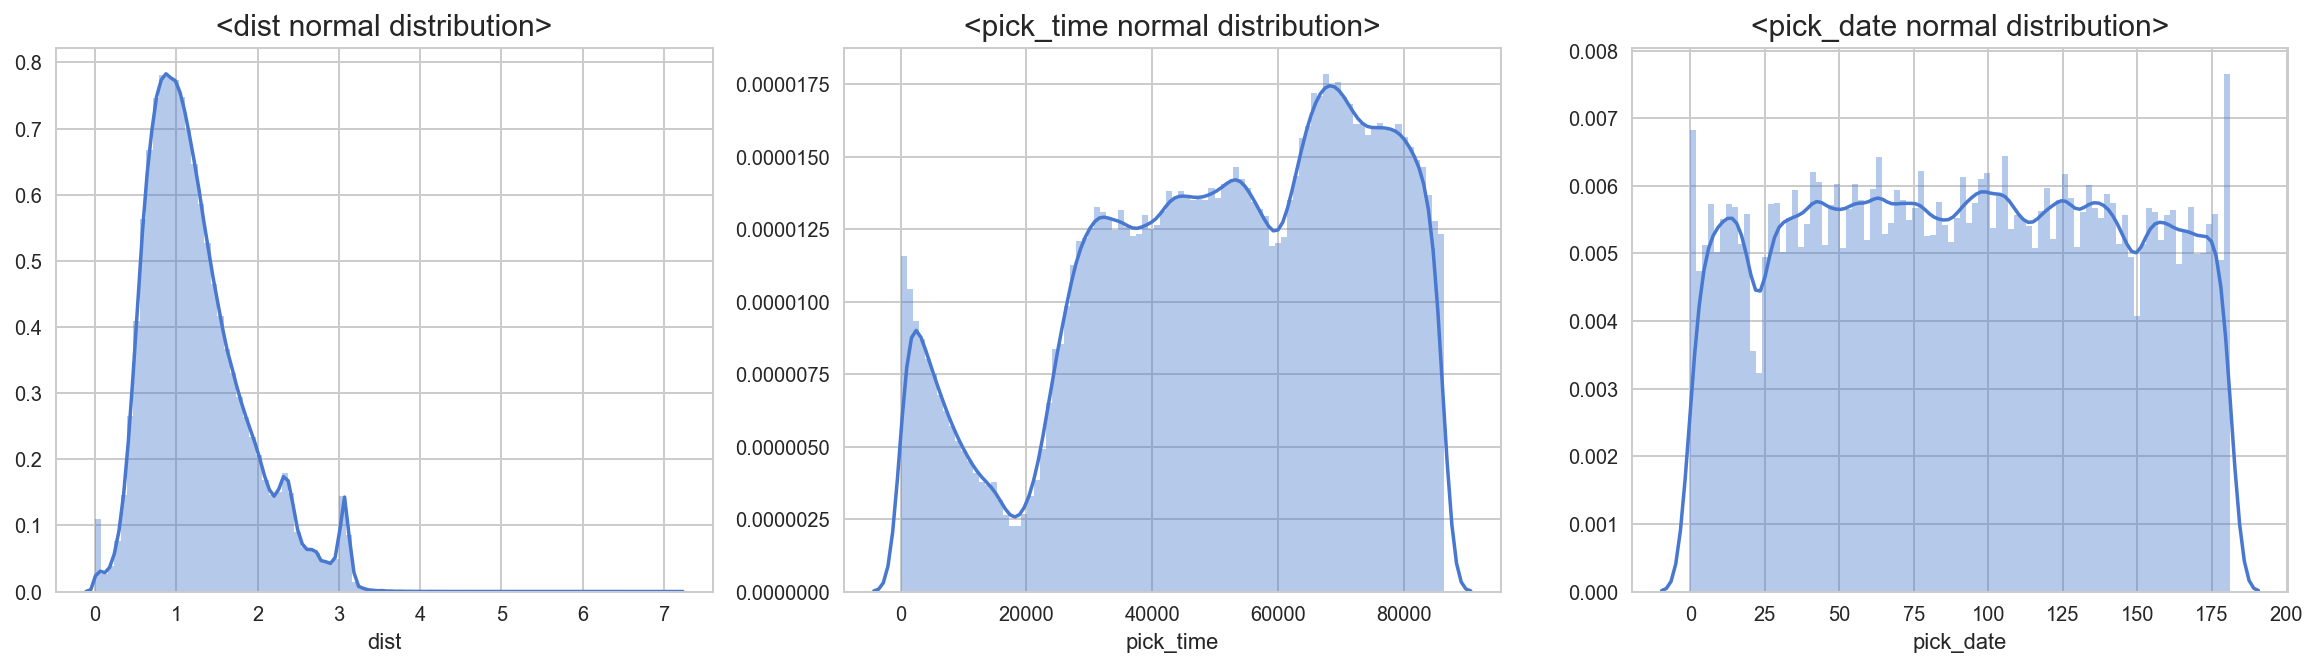

In [18]:
plt.figure(figsize=(20, 5))
plt.subplots_adjust(wspace = 0.2)

# dist
plt.subplot(131)
plt.title("<dist normal distribution>", fontsize = 15)
sns.distplot(np.log1p(taxi["dist"]).values, 
             axlabel = "dist", label = "dist", bins = 90, color = "b")

# pick_time
plt.subplot(132)
plt.title("<pick_time normal distribution>", fontsize = 15)
sns.distplot(taxi["pick_time"].values, 
             axlabel = "pick_time", label = "pick_time", bins = 90, color = "b")

# pick_date
plt.subplot(133)
plt.title("<pick_date normal distribution>", fontsize = 15)
sns.distplot(taxi["pick_date"].values, 
             axlabel = "pick_date", label = "pick_date", bins = 90, color = "b")

plt.show()

## B. Correlation

### a. Heatmap

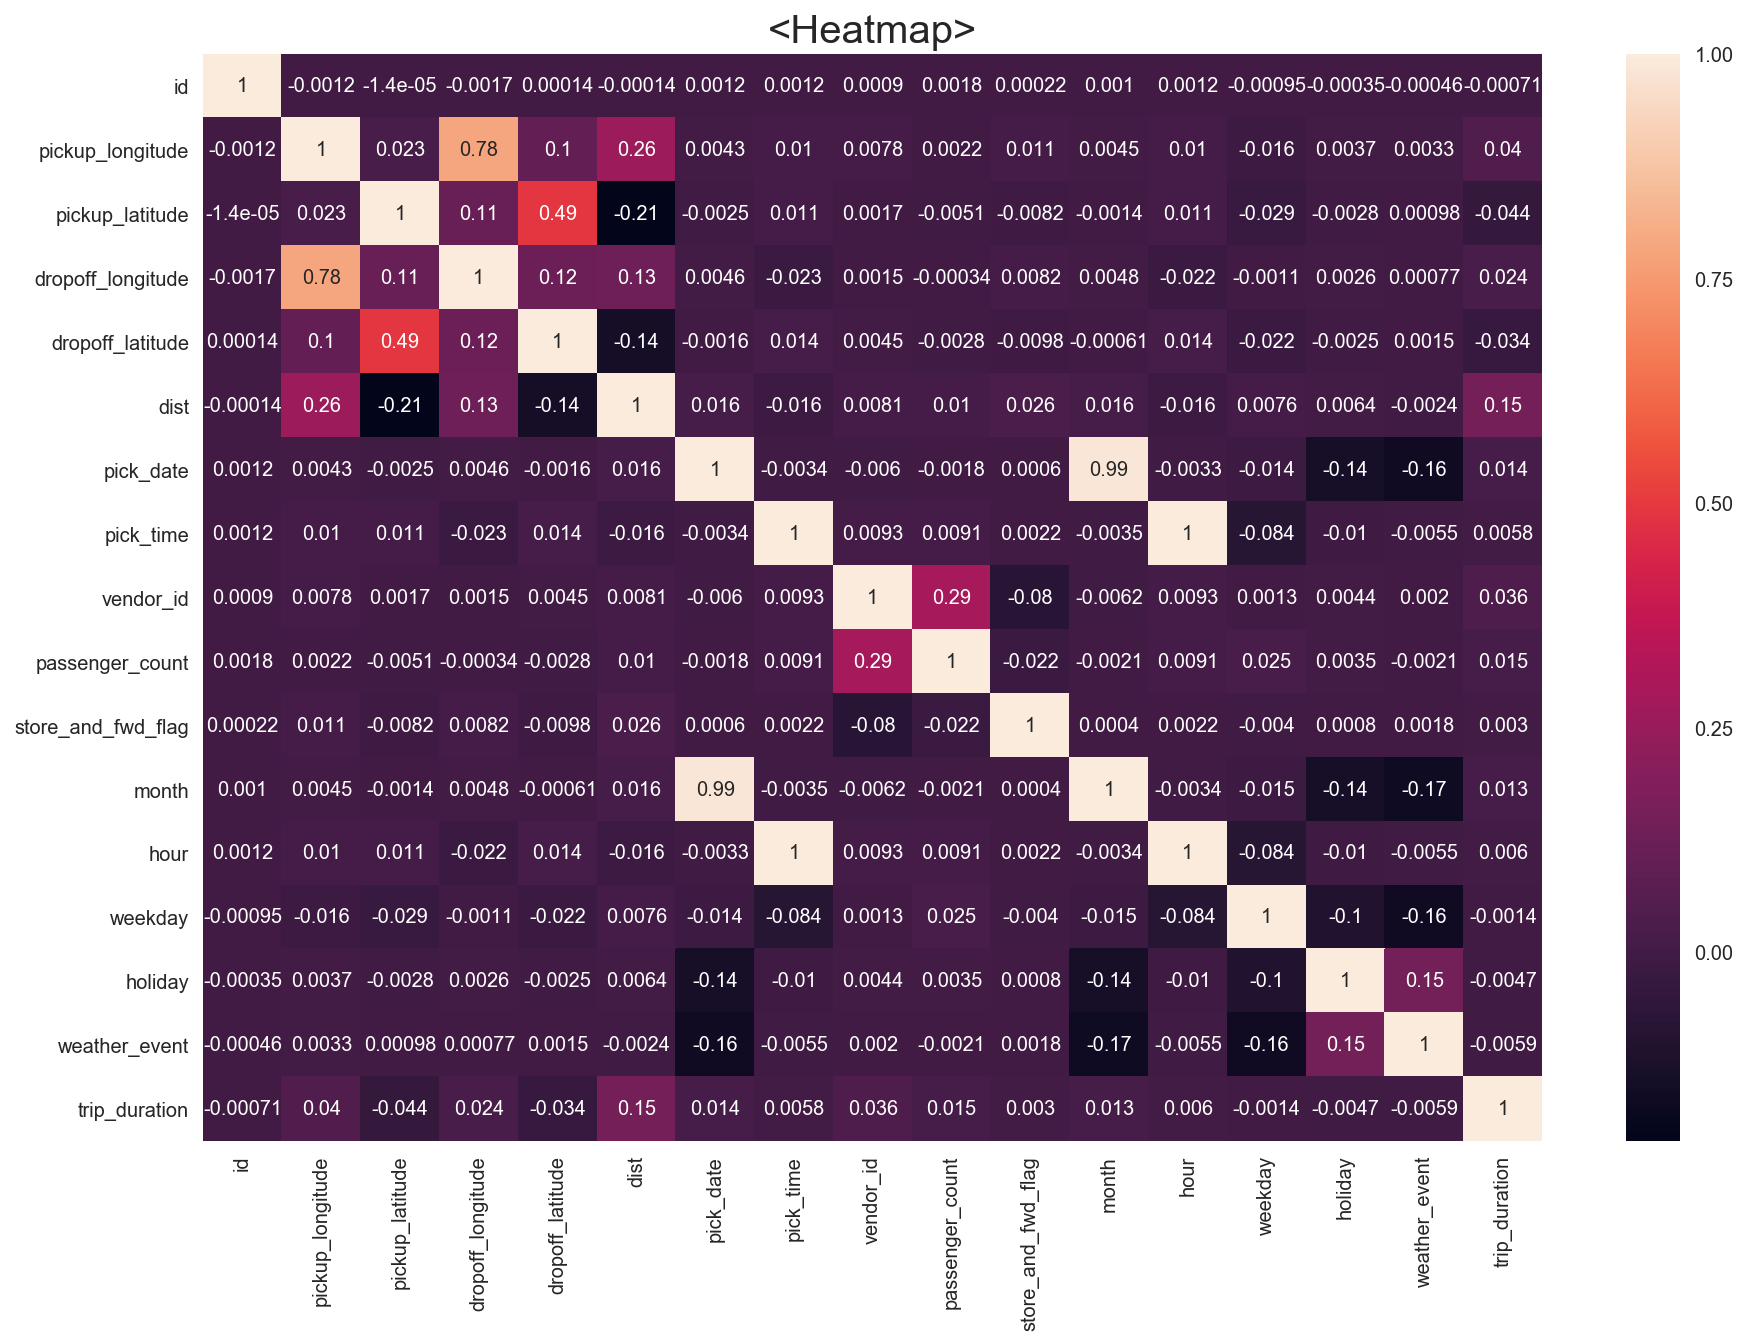

In [19]:
f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(taxi.corr(), annot=True)
plt.title("<Heatmap>", fontsize = 20)

plt.show()

### b. VIF ( Variance Inflation Factor )

In [20]:
taxi_vif = taxi.drop(['trip_duration'], axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(taxi_vif.values, i) for i in range(taxi_vif.shape[1])]
vif["features"] = taxi_vif.columns
vif

VIF Factor            features
0        3.997                  id
1        2.693    pickup_longitude
2        1.095     pickup_latitude
3        2.495   dropoff_longitude
4        1.146    dropoff_latitude
5        1.043                dist
6       35.187           pick_date
7      454.857           pick_time
8        1.097           vendor_id
9        1.091     passenger_count
10       1.007  store_and_fwd_flag
11      35.278               month
12     454.859                hour
13       1.047             weekday
14       1.045             holiday
15       1.074       weather_event

---

# 2. Rough modeling

## A. Summary

In [21]:
feature_n, features = get_features(taxi, 0, -1)
model =  sm.OLS.from_formula("trip_duration ~ {}".format(features), data = taxi)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          trip_duration   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     2319.
Date:                Thu, 15 Mar 2018   Prob (F-statistic):               0.00
Time:                        16:49:25   Log-Likelihood:            -1.3811e+07
No. Observations:             1458640   AIC:                         2.762e+07
Df Residuals:                 1458623   BIC:                         2.762e+07
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           9.003e+04   5102.752     17.644      0.000       8e+04       1e+05
id                 -2.049e-06   2.25e-06     -0.912      0.362   -6.45e-06    2.35e-06
pickup_longitude    -316.0858     61.211     -5.164      0.000    -436.058    -196.114
pickup_latitude     -944.1440     92.676    -10.188      0.000   -1125.786    -762.502
dropoff_longitude    555.4376     60.131      9.237      0.000     437.583     673.292
dropoff_latitude    -826.7538     83.789     -9.867      0.000    -990.978    -662.530
dist                 109.5650      0.646    169.522      0.000     108.298     110.832
pick_date              0.5620      0.298      1.884      0.060      -0.023       1.147
pick_time             -0.0057      0.002     -2.392      0.017      -0.010      -0.001
vendor_id            215.0824      5.445     39.503      0.000     204.411     225.754
passenger_count        8.4137      2.061      4.083      0.000       4.375      12.453
store_and_fwd_flag    71.1140     35.139      2.024      0.043       2.242     139.986
month                  1.7536      9.162      0.191      0.848     -16.203      19.711
hour                  24.7230      8.642      2.861      0.004       7.786      41.660
weekday               -5.6798      1.358     -4.183      0.000      -8.341      -3.018
holiday              -85.1820     17.003     -5.010      0.000    -118.507     -51.857
weather_event        -42.9773      9.329     -4.607      0.000     -61.262     -24.692
==============================================================================
Omnibus:                  3542576.342   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):      29873545568.679
Skew:                          25.984   Prob(JB):                         0.00
Kurtosis:                     702.163   Cond. No.                     4.54e+09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.54e+09. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## B. 잔차 정규성 검정

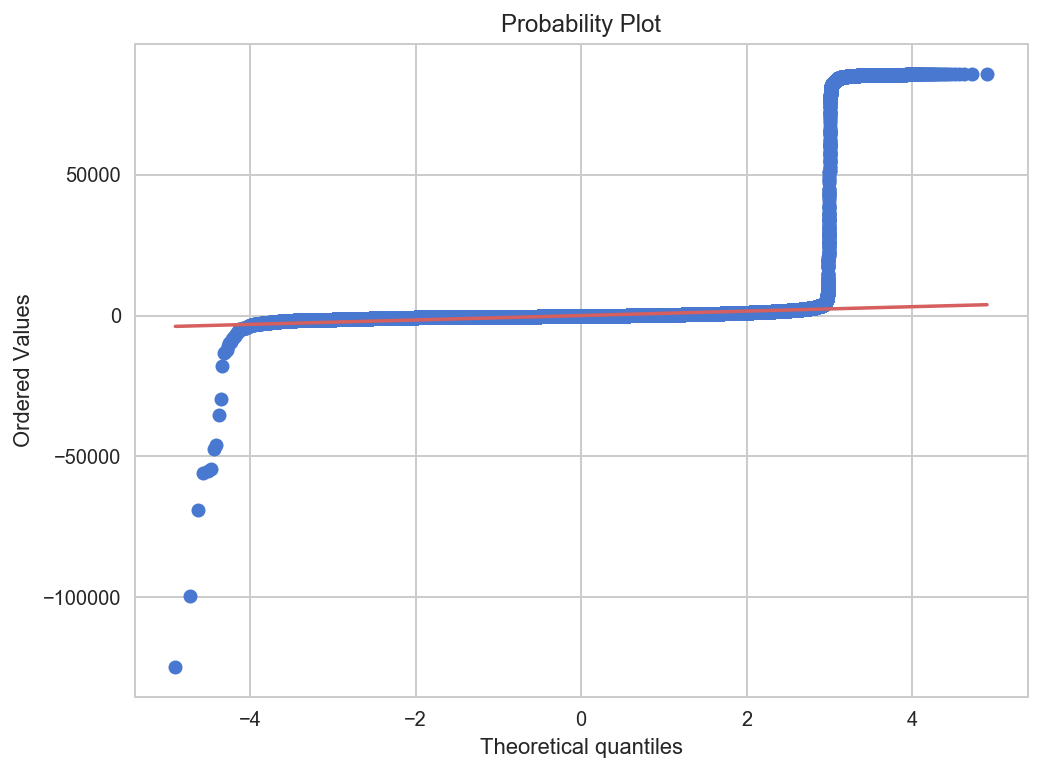

In [22]:
# probplot
f, ax = plt.subplots(figsize=(8, 6))
sp.stats.probplot(result.resid, plot = plt)

plt.show()

## C. Residual-feature 관계 검정

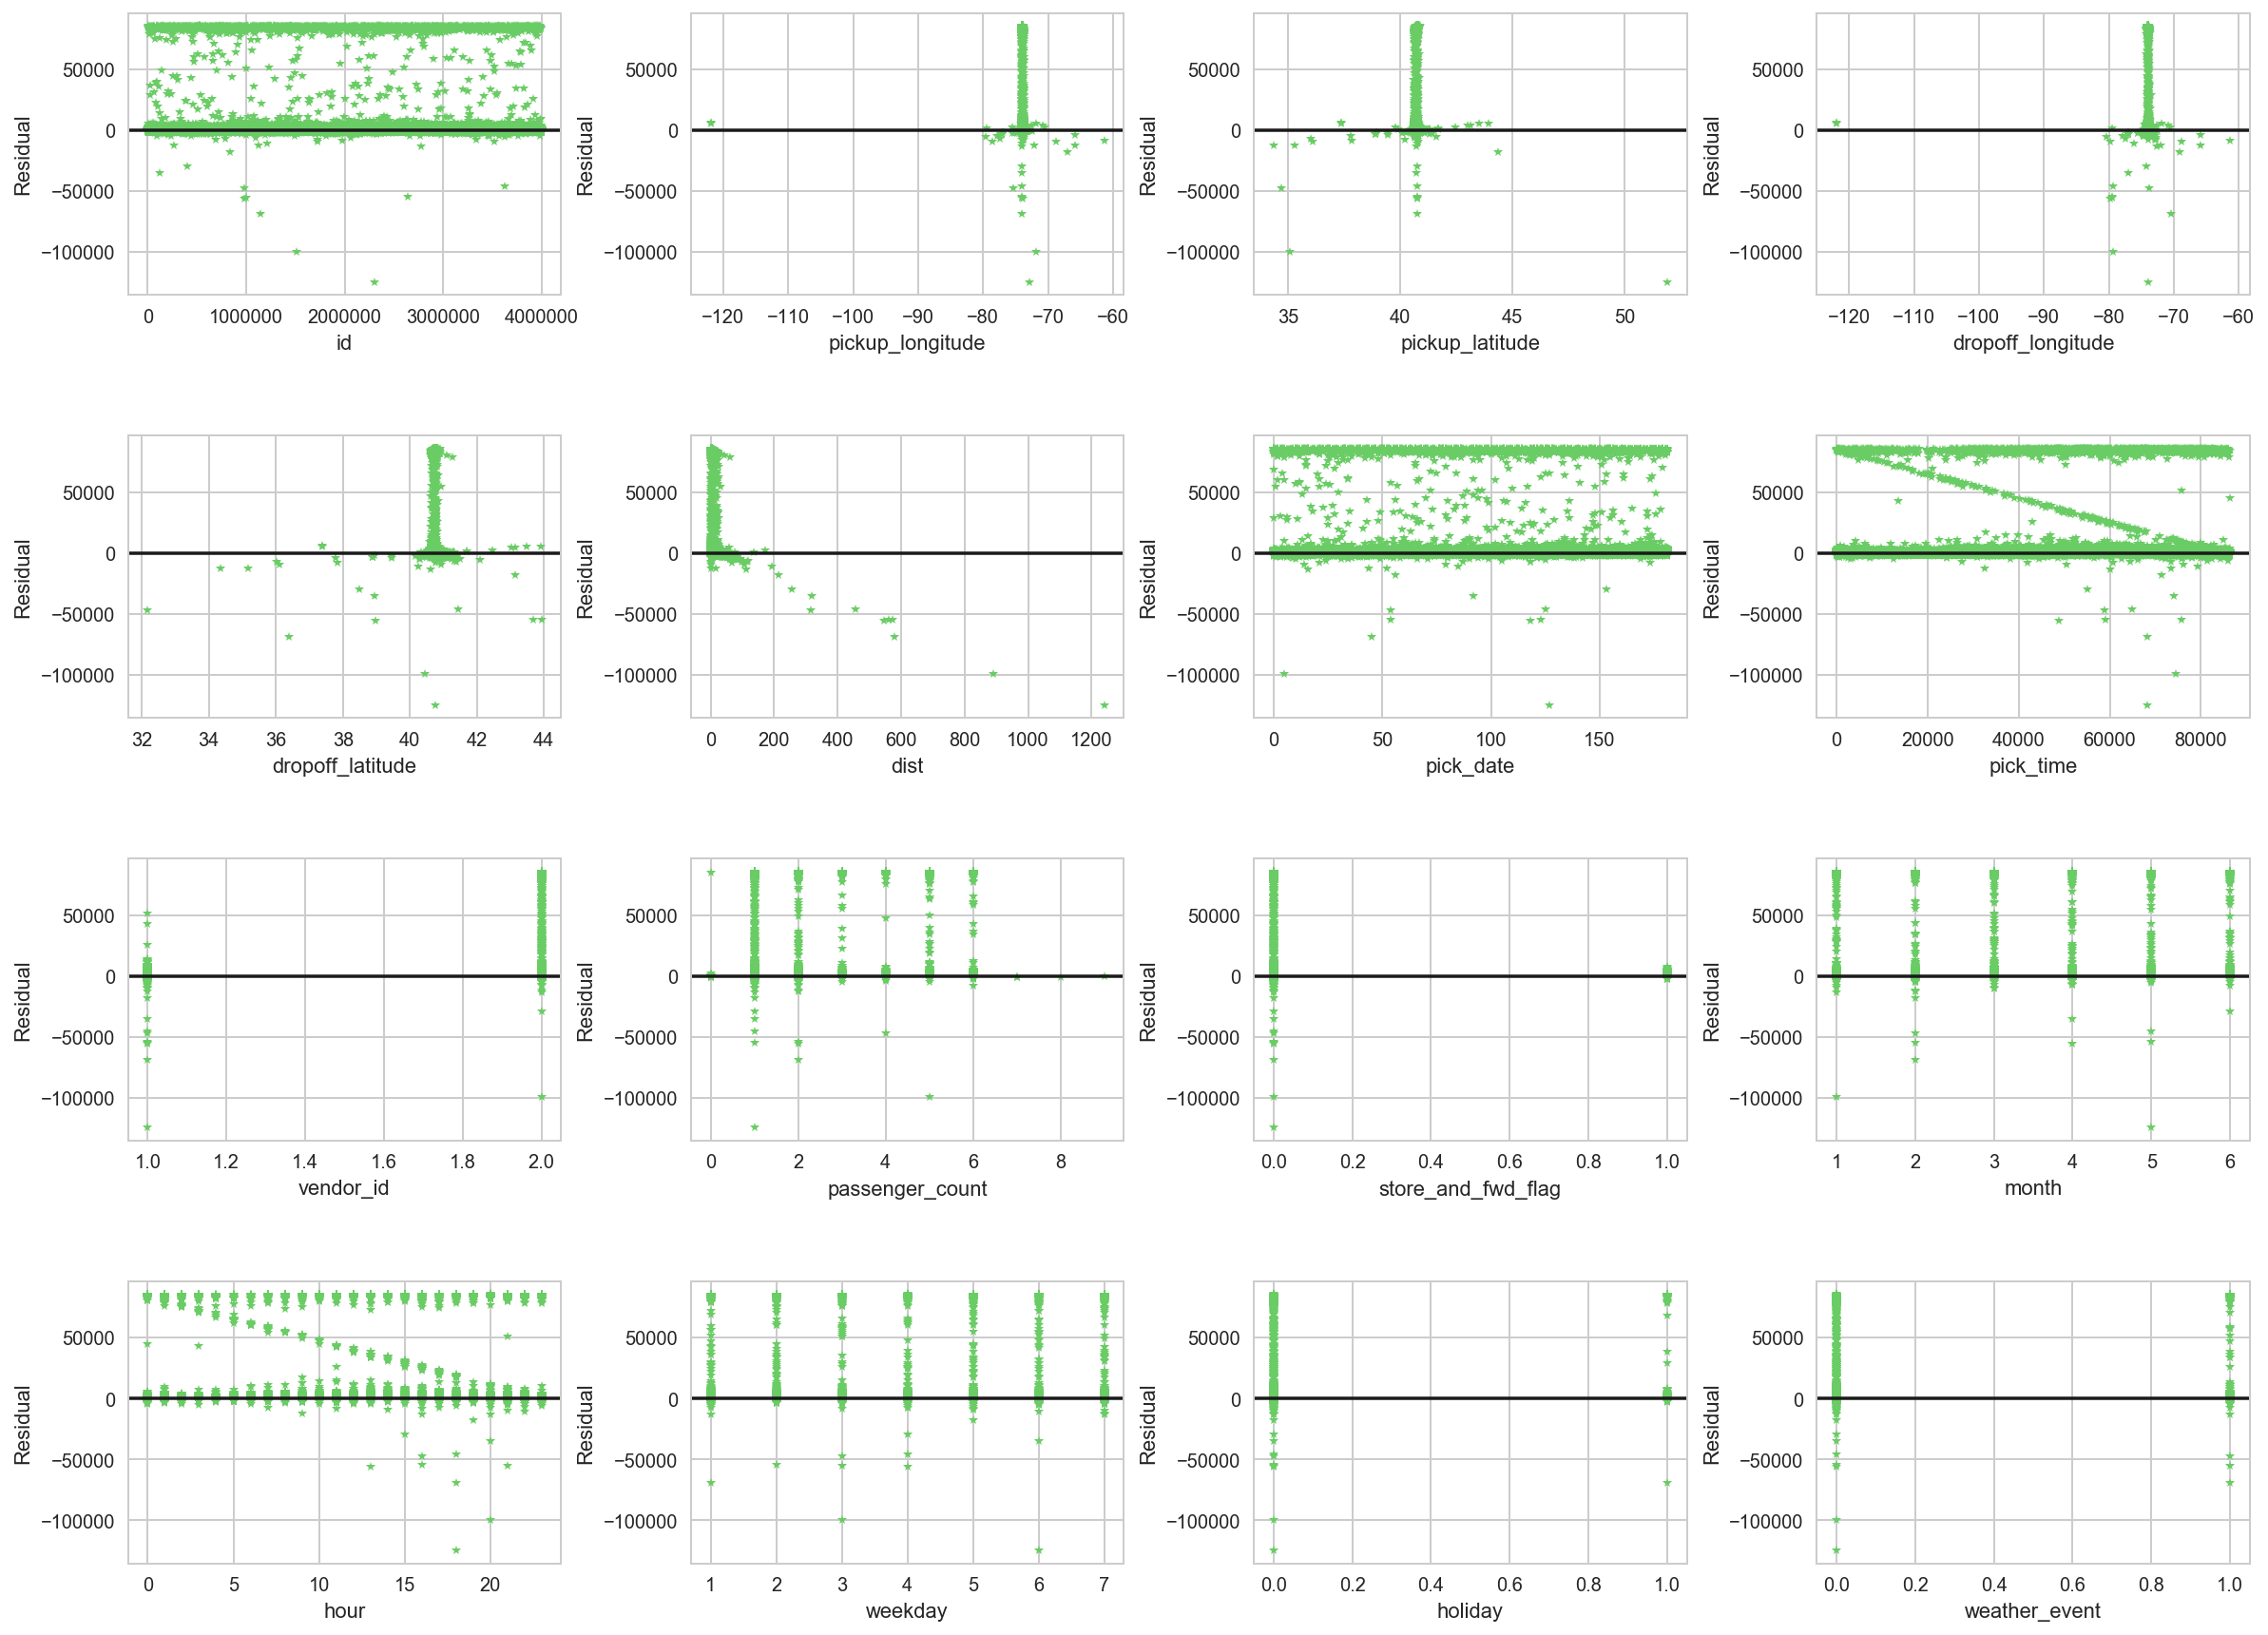

In [23]:
plt.figure(figsize=(20, 15))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i in range(1, 16+1):
    plt.subplot(4,4,i)
    plt.plot(taxi[taxi.columns[i-1]], result.resid, 'g*', markersize=5)
    plt.axhline(y=0, c='k')
    plt.xlabel(taxi.columns[i-1])
    plt.ylabel("Residual")

plt.show()

## D. 이분산 검정
Feature 값이 증가함에 따른 y 값 분포 체크

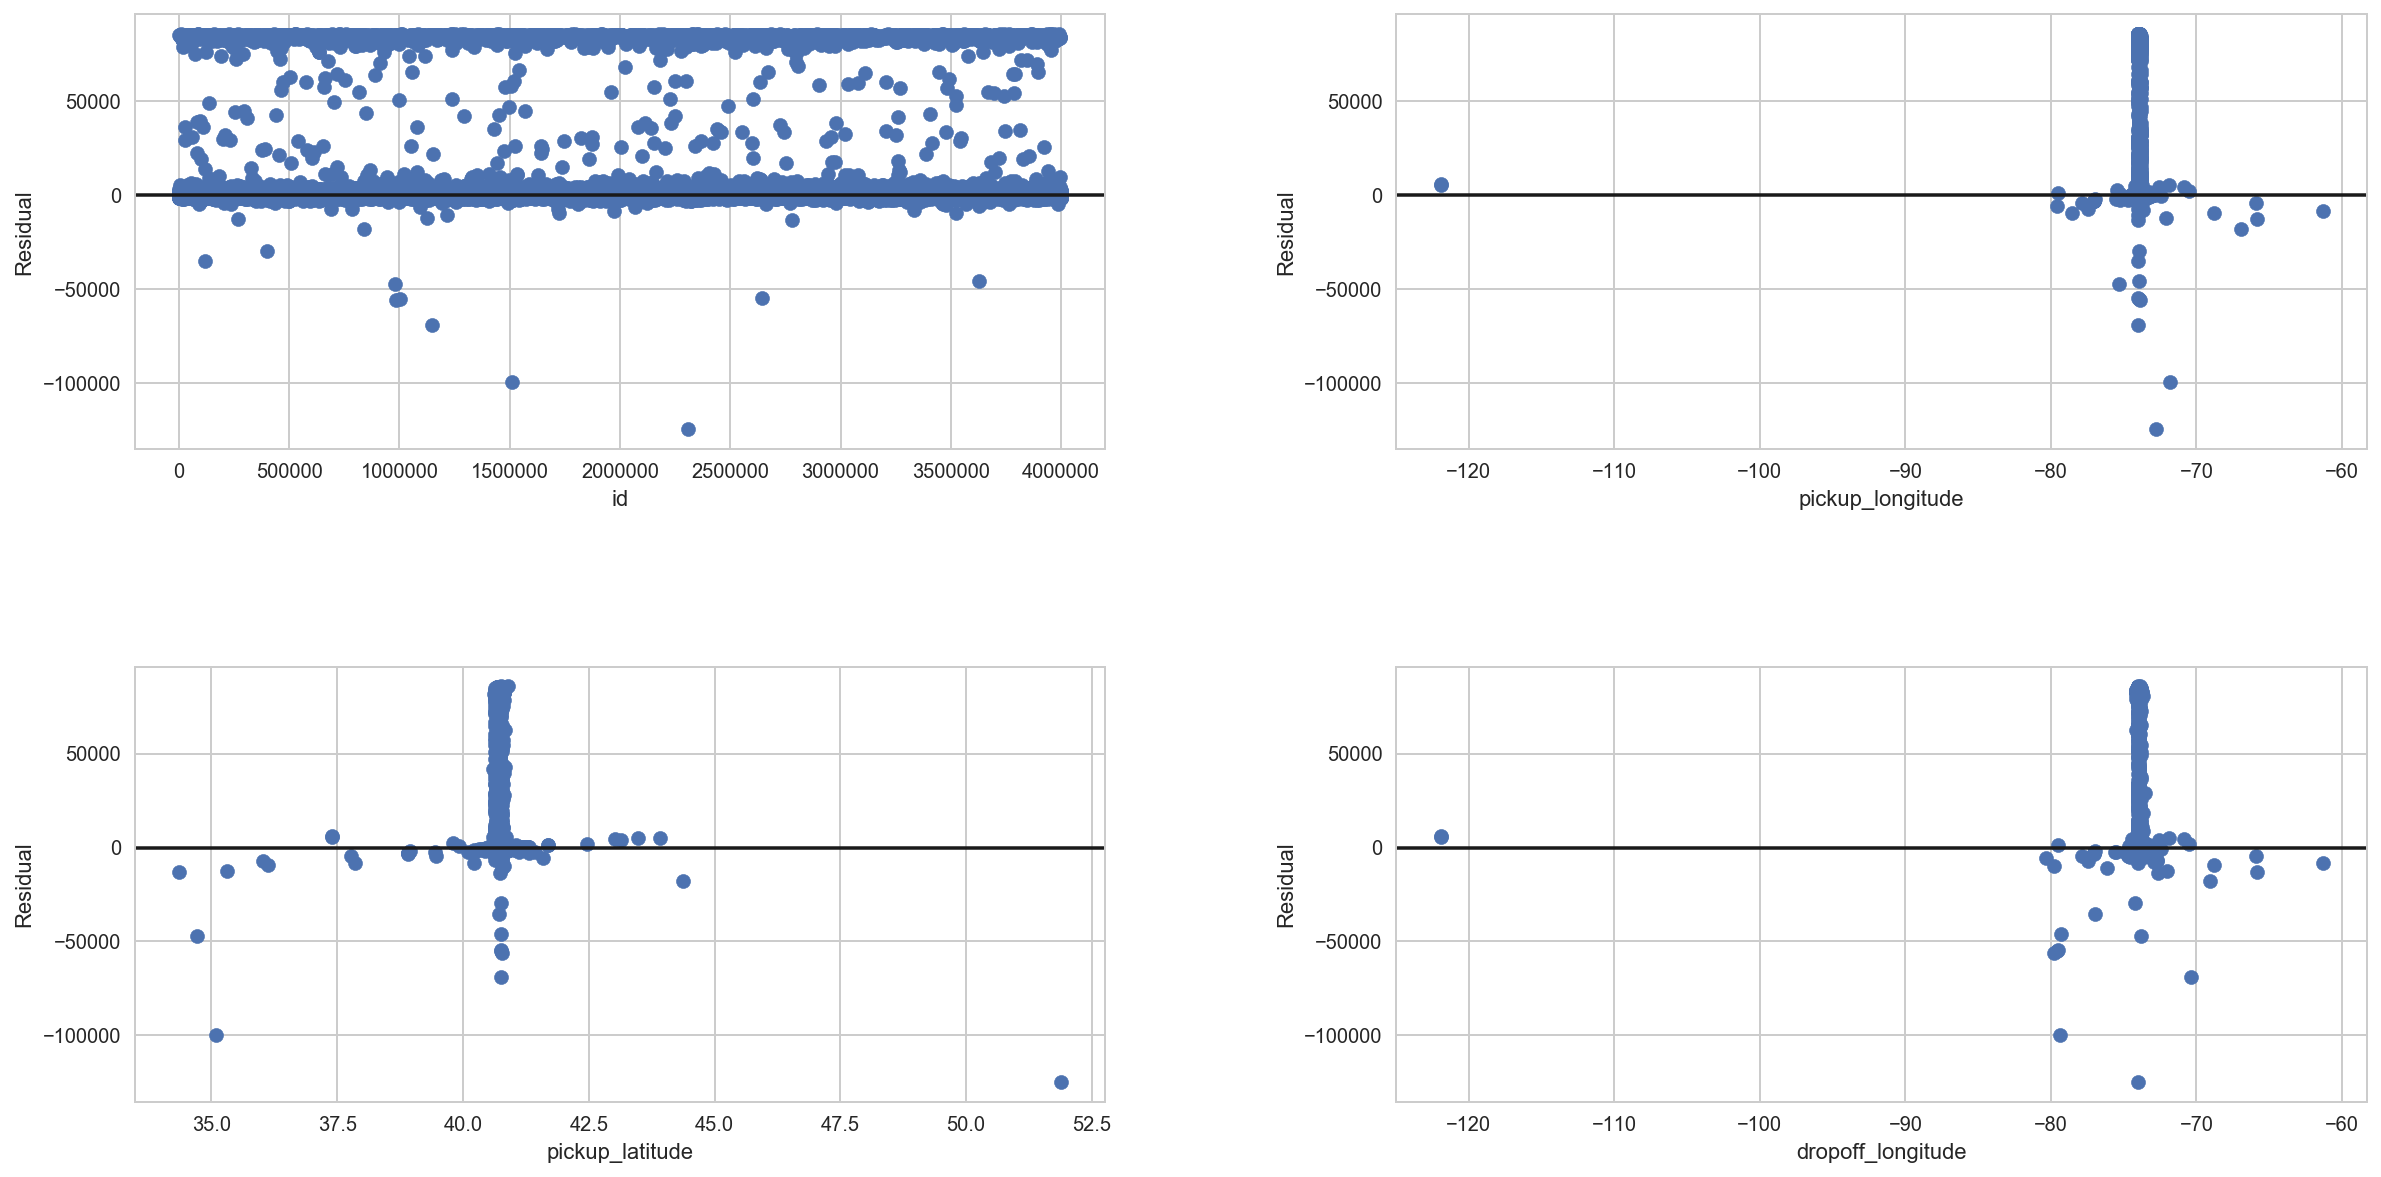

In [24]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i in range(1, 4+1):
    plt.subplot(2,2,i)
    plt.scatter(taxi[taxi.columns[i-1]], result.resid)
    plt.axhline(y=0, c='k')
    plt.xlabel(taxi.columns[i-1])
    plt.ylabel("Residual")

plt.show()

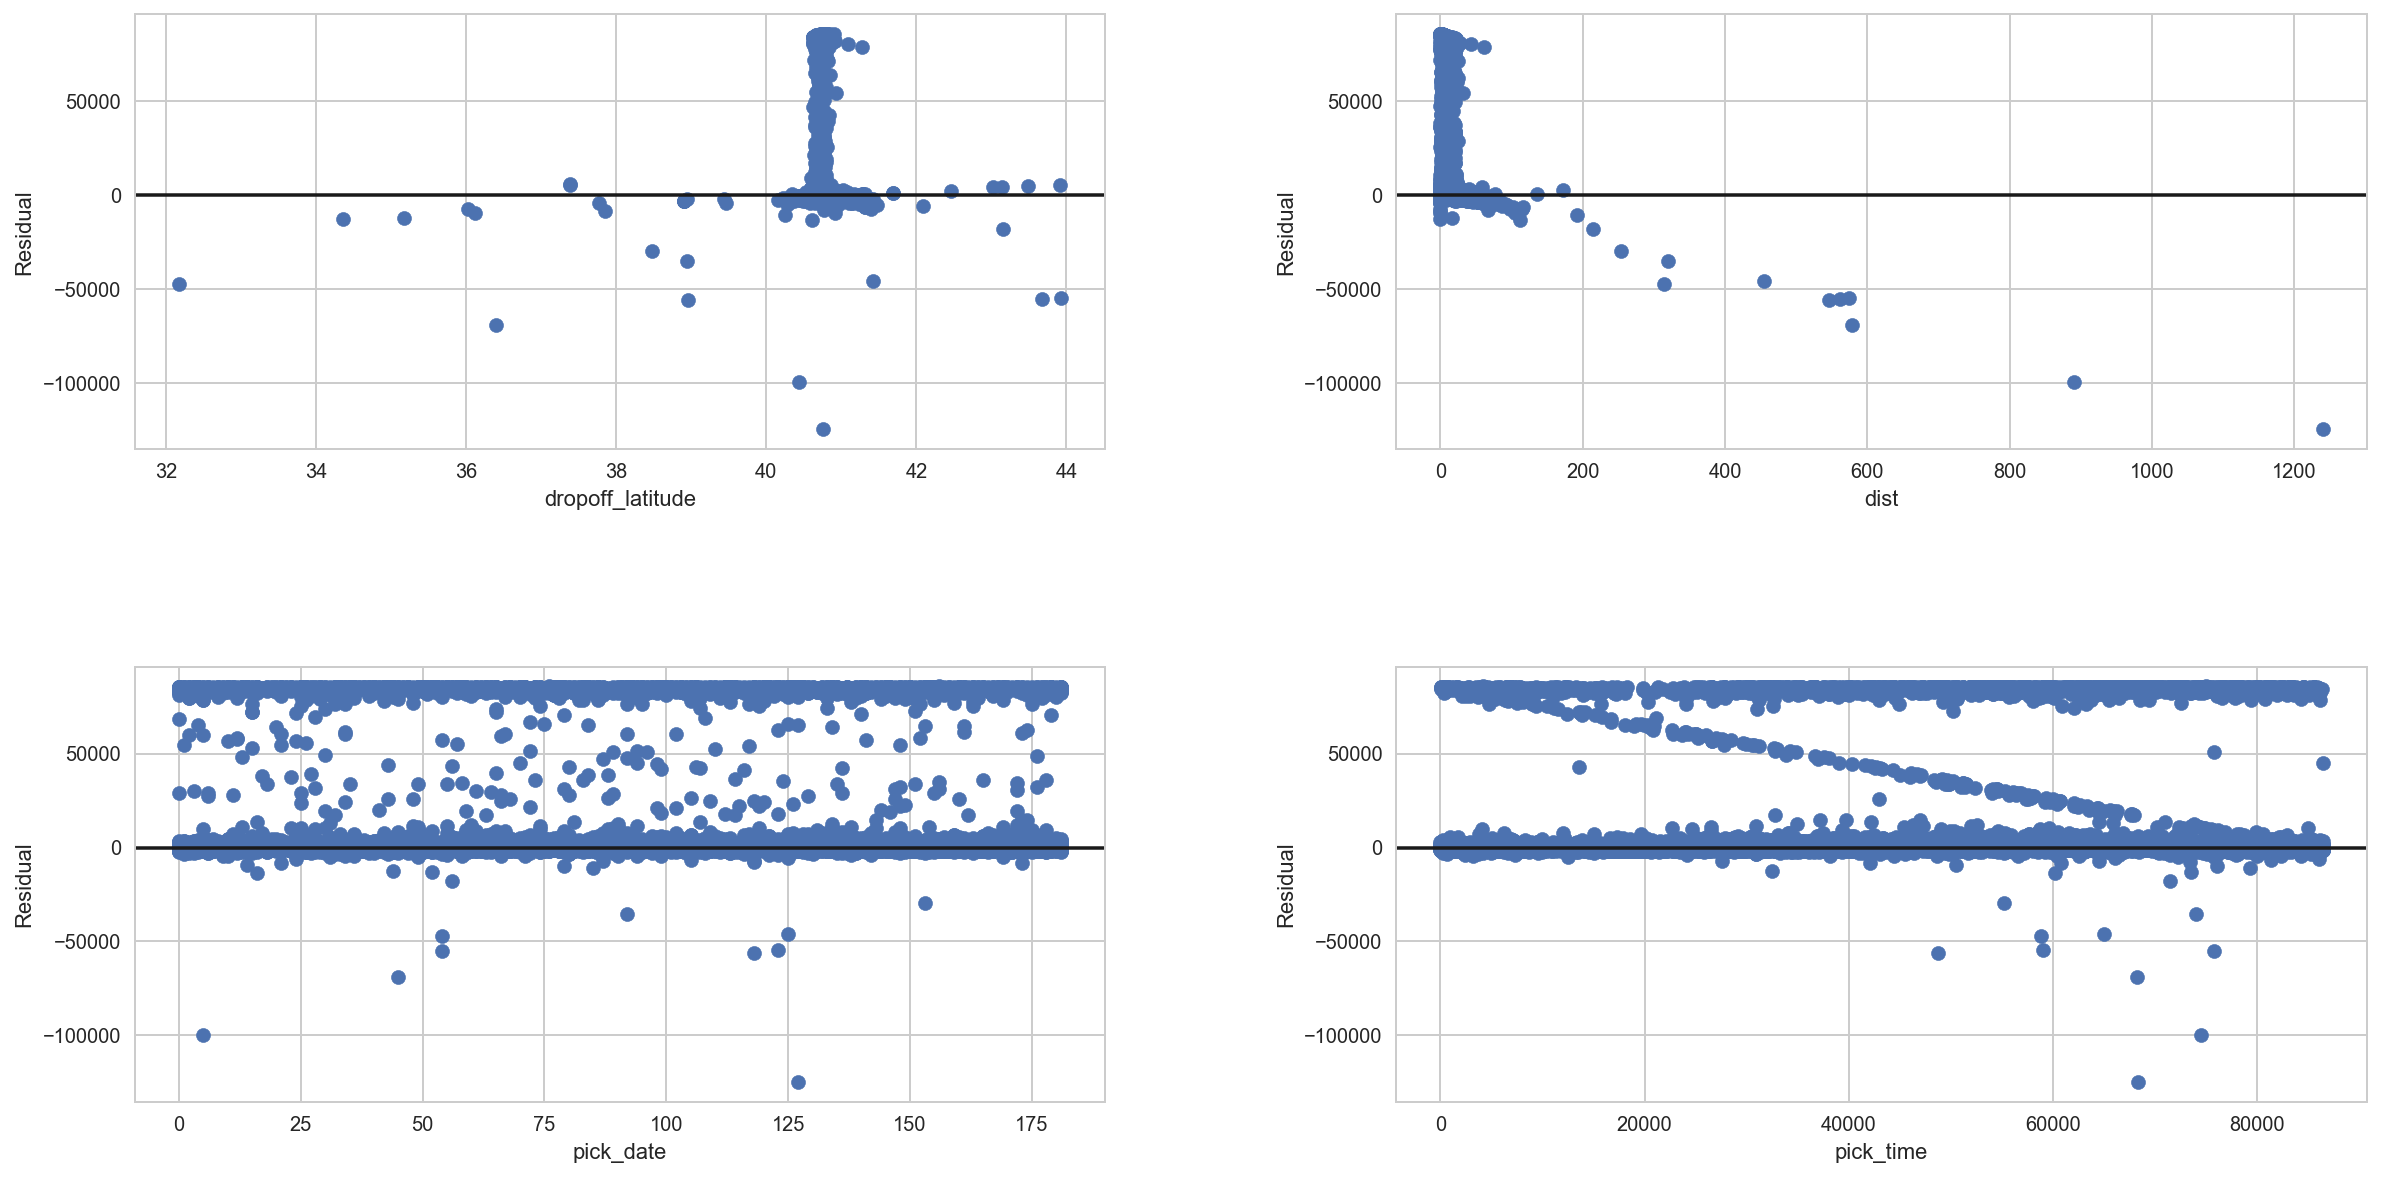

In [25]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i in range(5, 8+1):
    plt.subplot(2,2,i-4)
    plt.scatter(taxi[taxi.columns[i-1]], result.resid)
    plt.axhline(y=0, c='k')
    plt.xlabel(taxi.columns[i-1])
    plt.ylabel("Residual")

plt.show()

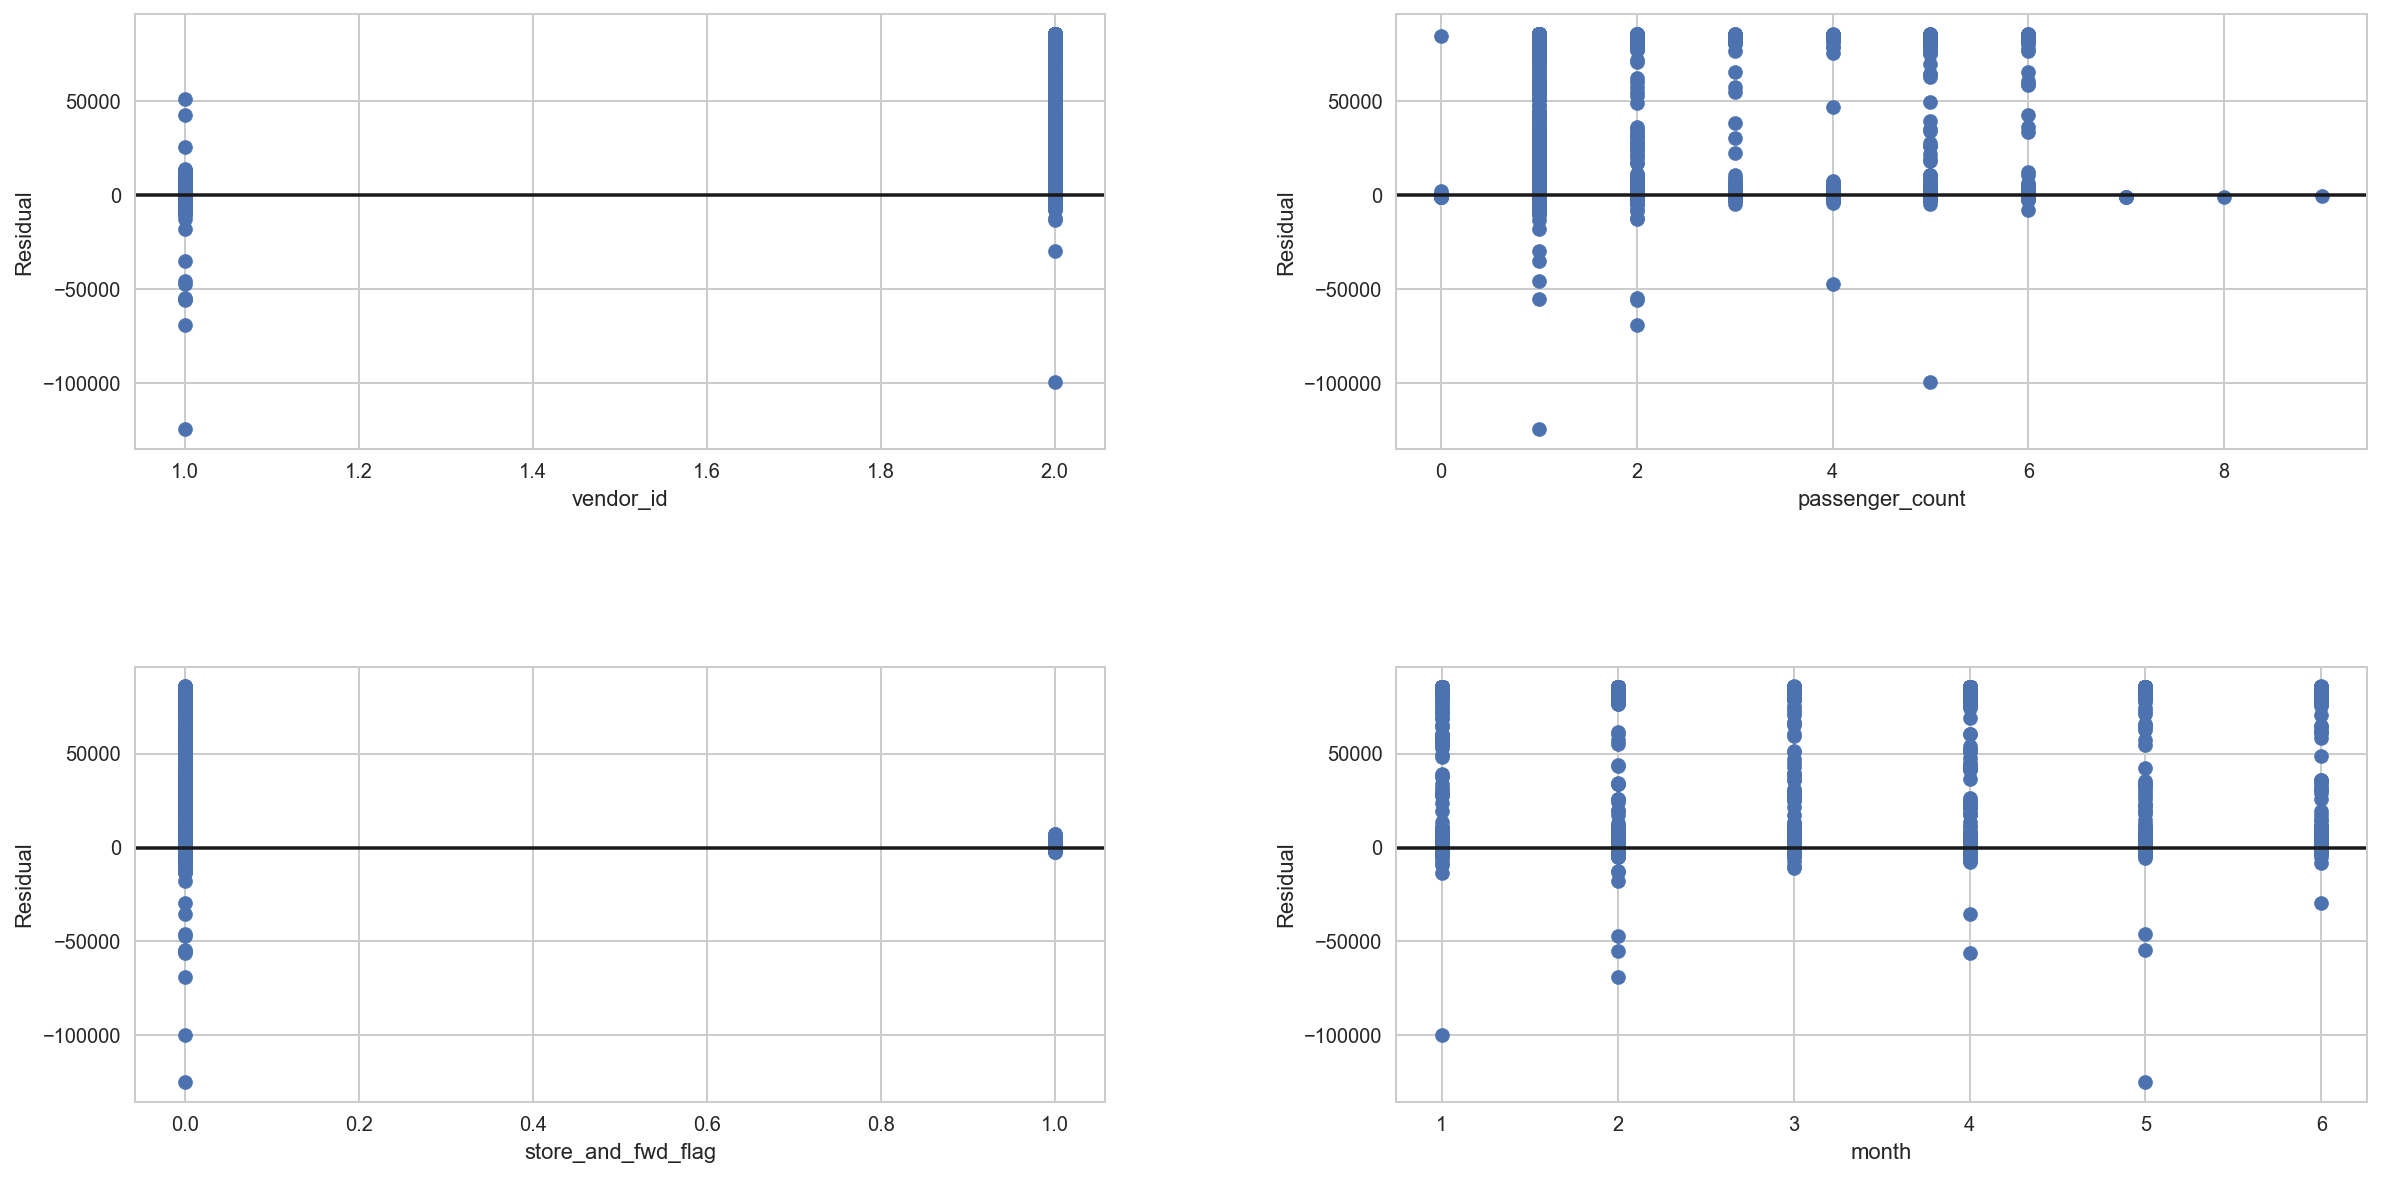

In [26]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i in range(9, 12+1):
    plt.subplot(2,2,i-8)
    plt.scatter(taxi[taxi.columns[i-1]], result.resid)
    plt.axhline(y=0, c='k')
    plt.xlabel(taxi.columns[i-1])
    plt.ylabel("Residual")

plt.show()

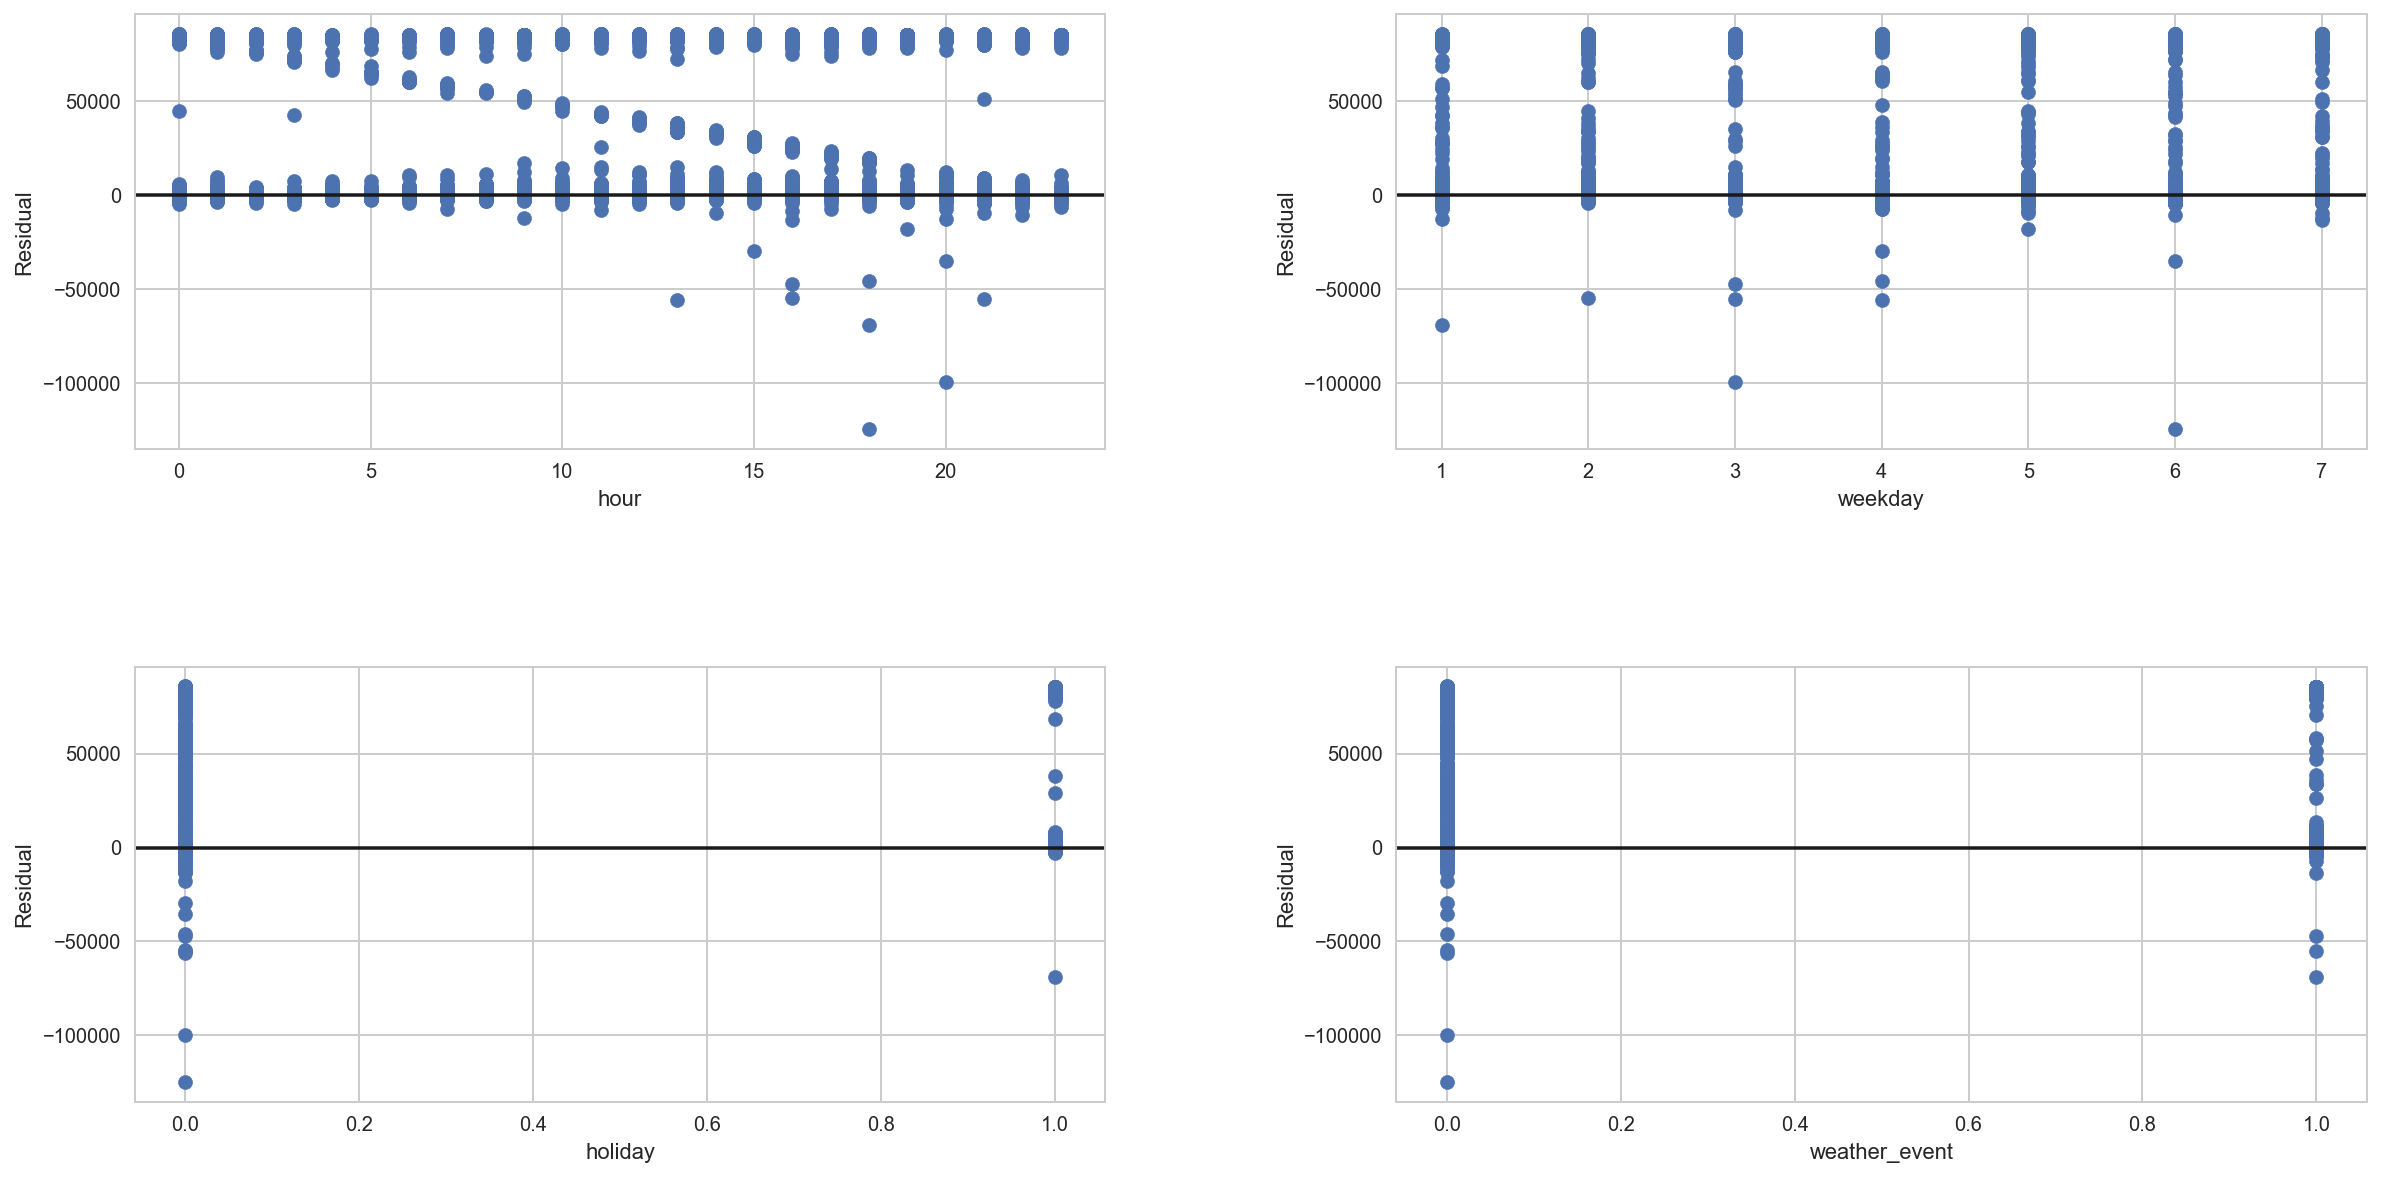

In [27]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i in range(13, 16+1):
    plt.subplot(2,2,i-12)
    plt.scatter(taxi[taxi.columns[i-1]], result.resid)
    plt.axhline(y=0, c='k')
    plt.xlabel(taxi.columns[i-1])
    plt.ylabel("Residual")

plt.show()

## E. 자기상관 검정

In [28]:
# Durbin-Watson 검정 : 값이 2 -> 무상관
durbin_watson(result.wresid)

2.0001621507699263

## F. Target-feature check

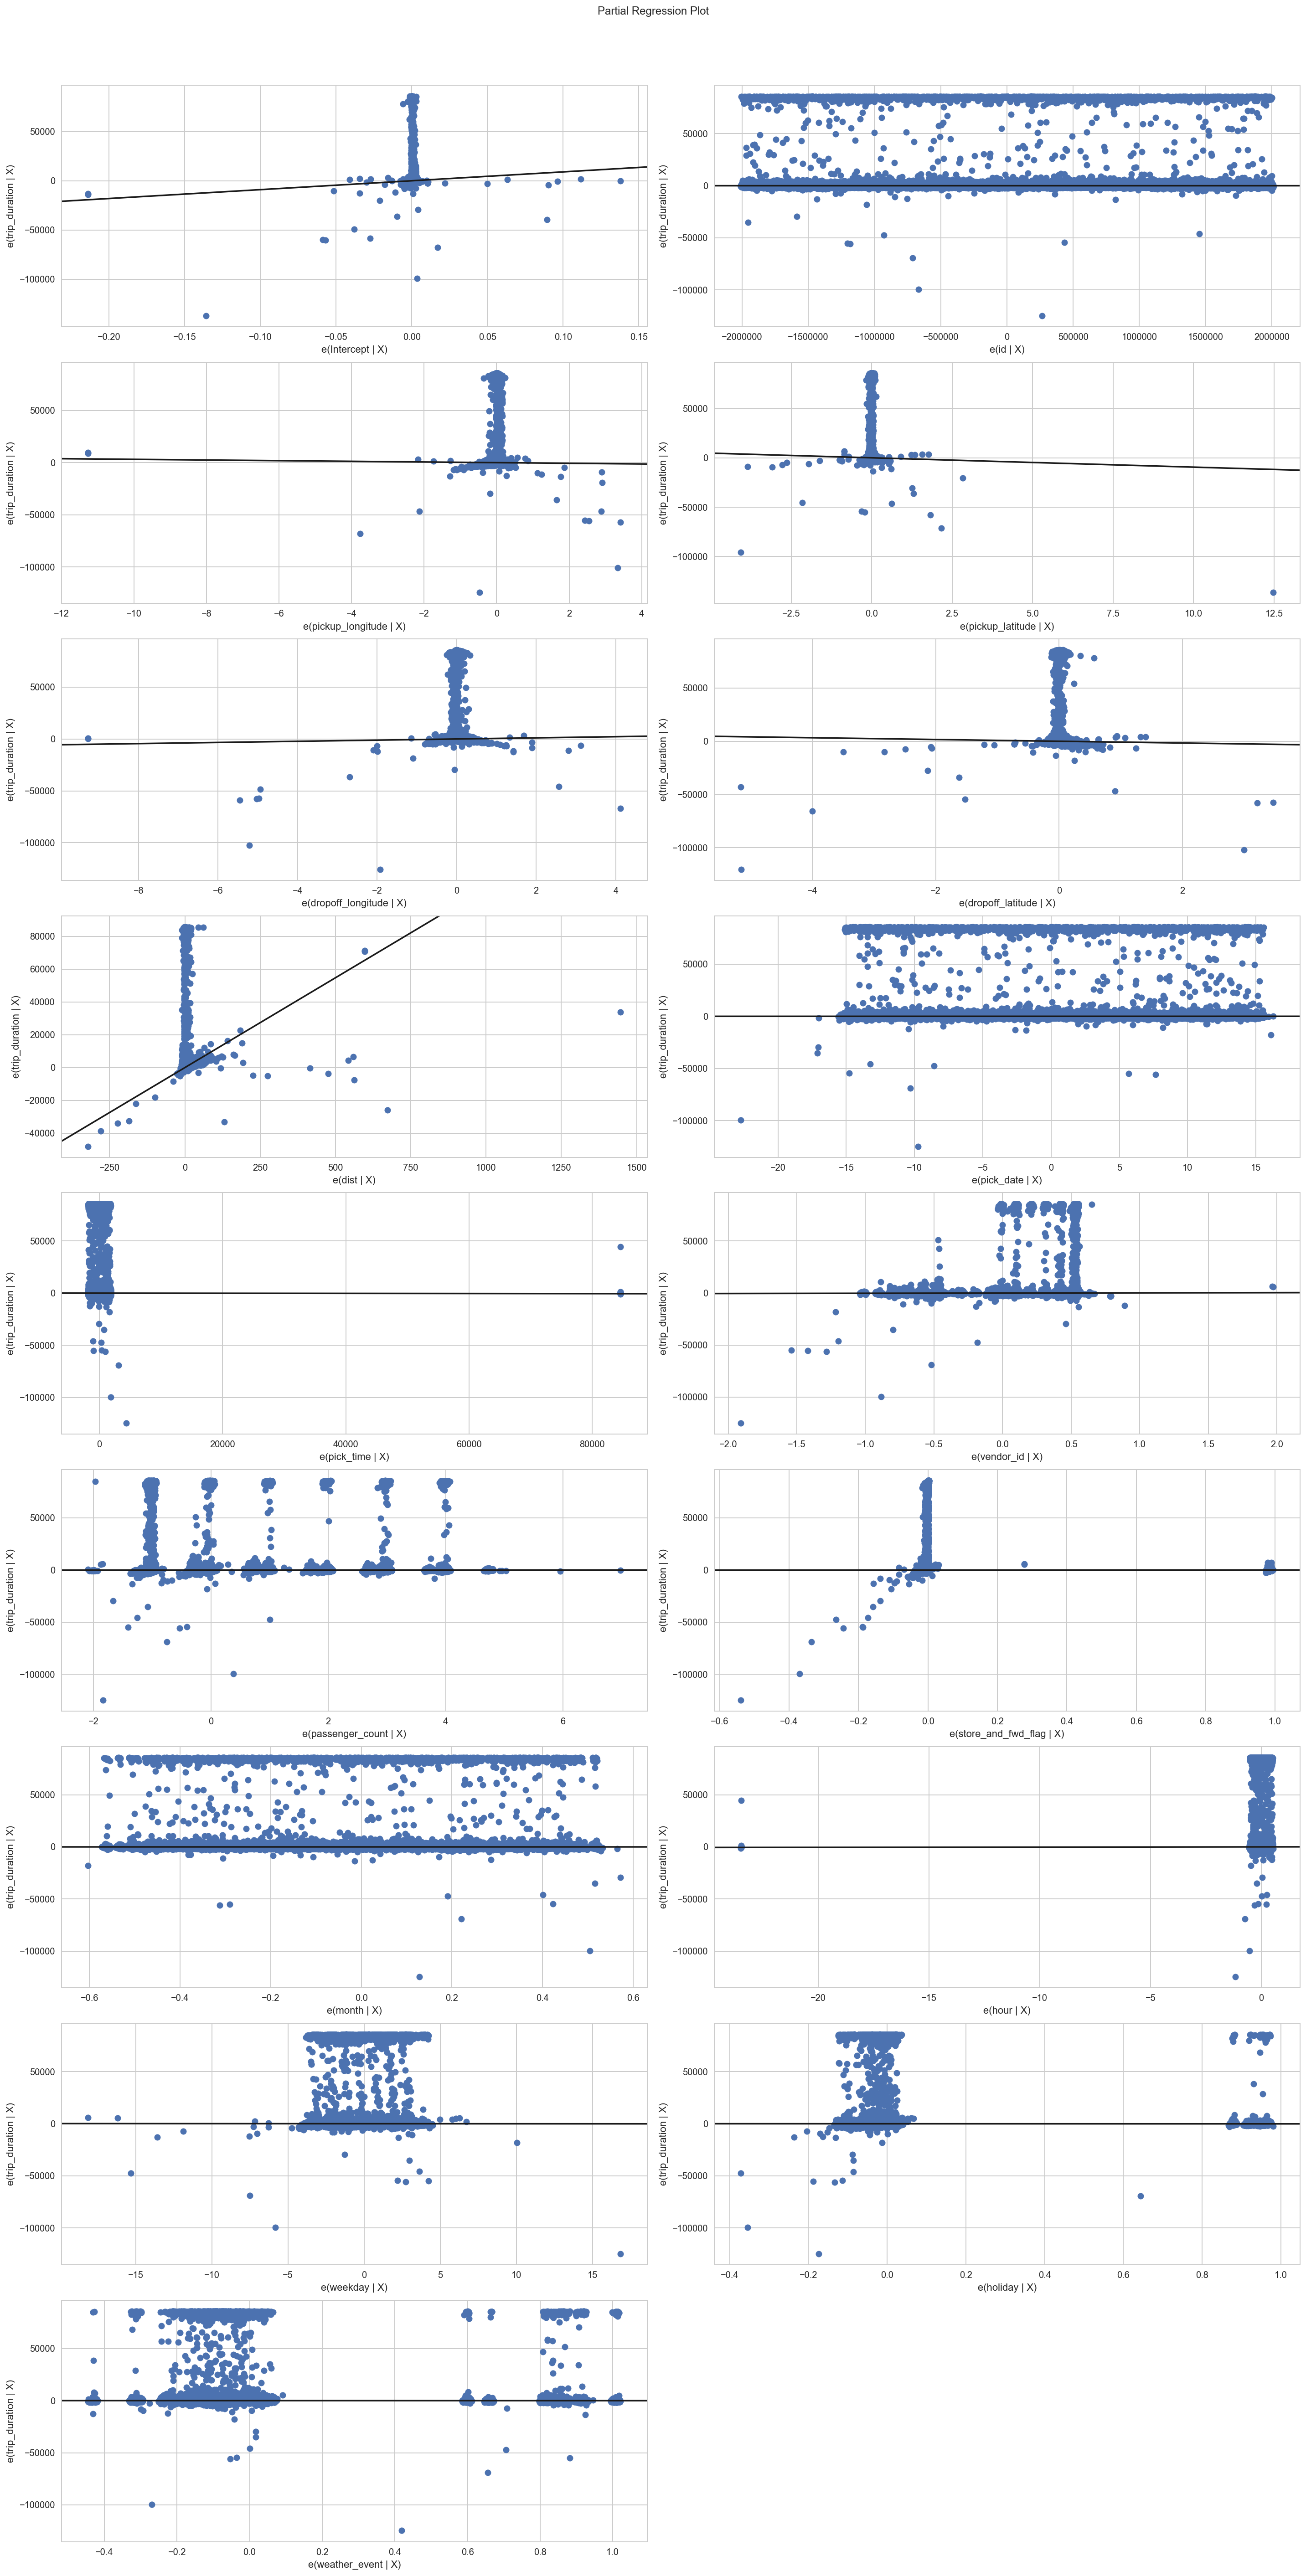

In [29]:
# partial regression 
fig = plt.figure(figsize=(20, 40))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)
sm.graphics.plot_partregress_grid(result, fig=fig)
plt.show()

---

# 3. Optimal regulization

### A. Dist setting

In [30]:
# dist scale 생성
distset = dmatrix("scale(np.log1p(dist)) + scale(np.log1p(dist)**2) + scale(np.log1p(dist)**3) \
                 + scale(np.log1p(dist)**4) + scale(np.log1p(dist)**5) + 0", data=taxi, return_type='dataframe')

# columns name 변경
distset.columns = ['dist1', 'dist2', 'dist3', 'dist4', 'dist5']

In [31]:
# taxi에 distset concat
taxi = pd.concat([taxi, distset], axis=1, join_axes = [taxi.index])

In [32]:
taxi.tail()

id  pickup_longitude  pickup_latitude  dropoff_longitude  \
1458635  2376096           -73.982           40.746            -73.995   
1458636  1049543           -74.001           40.747            -73.970   
1458637  2304944           -73.959           40.769            -74.004   
1458638  2714485           -73.982           40.749            -73.975   
1458639  1209952           -73.980           40.782            -73.973   

         dropoff_latitude  dist  pick_date  pick_time  vendor_id  \
1458635            40.740 1.224         98      48663          2   
1458636            40.797 6.046          9      27314          1   
1458637            40.707 7.820        112      25060          2   
1458638            40.757 1.092          4      57385          1   
1458639            40.791 1.133         95      53064          1   

         passenger_count  ...    hour  weekday  holiday  weather_event  \
1458635                4  ...      13        5        0              0   
1458636                1  ...       7        7        0              1   
1458637                1  ...       6        5        0              0   
1458638                1  ...      15        2        0              0   
1458639                1  ...      14        2        0              0   

         trip_duration  dist1  dist2  dist3  dist4  dist5  
1458635            778 -0.725 -0.663 -0.542 -0.426 -0.314  
1458636            655  1.114  0.922  0.645  0.380  0.167  
1458637            764  1.472  1.386  1.138  0.832  0.518  
1458638            373 -0.823 -0.710 -0.561 -0.432 -0.316  
1458639            198 -0.792 -0.696 -0.555 -0.430 -0.315  

[5 rows x 22 columns]

### B. Dist optimzation

In [33]:
# dist 
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist", data = taxi).fit(), result_sets, "dist")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist + I(dist ** 2)", data = taxi).fit(), result_sets,"~ dist^2")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist + I(dist ** 2) + I(dist ** 3)", data = taxi).fit(),  result_sets," ~ dist^3")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist + I(dist ** 2) + I(dist ** 3) + I(dist ** 4)", data = taxi).fit(), result_sets, " ~ dist^4")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist + I(dist ** 2) + I(dist ** 3) + I(dist ** 4) + I(dist ** 5)", data = taxi).fit()
,  result_sets, " ~ dist^5")
result_sets

R-square         AIC         BIC          Cond.No.  Pb(Fstatics)  \
0     0.327 2908206.791 2908231.177             7.141         0.000   
1     0.380 2788734.352 2788770.931          2064.886         0.000   
2     0.395 2753119.288 2753168.060       2325380.264         0.000   
3     0.411 2715733.709 2715794.674    2874747175.731         0.000   
4     0.446 2625566.974 2625640.132 3916510268038.154         0.000   

   Pb(omnibus)  Pb(jb)  Dub-Wat    Remarks  
0        0.000   0.000    2.001       dist  
1        0.000   0.000    2.000   ~ dist^2  
2        0.000   0.000    1.999   ~ dist^3  
3        0.000   0.000    1.999   ~ dist^4  
4        0.000   0.000    1.999   ~ dist^5

In [34]:
# scale(dist)
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1", data = taxi).fit(), result_sets, "scale(np.log(dist))")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1 + dist2", data = taxi).fit(), result_sets," ~ scale(np.log(dist)^2)")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1 + dist2 + dist3", data = taxi).fit(), result_sets," ~ scale(np.log(dist)^3)")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1 + dist2 + dist3 + dist4", data = taxi).fit(), result_sets," ~ scale(np.log(dist)^4)")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1 + dist2 + dist3 + dist4 + dist5", data = taxi).fit(), result_sets," ~ scale(np.log(dis`t)^5)")
result_sets

R-square         AIC         BIC  Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.561 2287442.482 2287466.868     1.000         0.000        0.000   
1     0.589 2188172.296 2188208.875     7.367         0.000        0.000   
2     0.593 2176790.973 2176839.745    38.372         0.000        0.000   
3     0.593 2174790.107 2174851.072   108.274         0.000        0.000   
4     0.593 2173944.324 2174017.482   420.186         0.000        0.000   

   Pb(jb)  Dub-Wat                    Remarks  
0   0.000    1.998        scale(np.log(dist))  
1   0.000    1.998    ~ scale(np.log(dist)^2)  
2   0.000    1.998    ~ scale(np.log(dist)^3)  
3   0.000    1.998    ~ scale(np.log(dist)^4)  
4   0.000    1.998   ~ scale(np.log(dis`t)^5)

---

### C. Choose

 성능이 준수한 `np.log(trip_duration) ~ scale(np.log1p(dist))` 기준으로 진행

In [35]:
# id
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1", data = taxi).fit(), result_sets,"default")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ id + dist1", data = taxi).fit(), result_sets,"id")
result_sets

R-square         AIC         BIC    Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.561 2287442.482 2287466.868       1.000         0.000        0.000   
1     0.561 2287440.854 2287477.433 4615345.783         0.000        0.000   

   Pb(jb)  Dub-Wat  Remarks  
0   0.000    1.998  default  
1   0.000    1.998       id

In [36]:
# vendor_id
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1", data = taxi).fit(), result_sets,"default")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ vendor_id + dist1", data = taxi).fit(), result_sets,"vendor_id")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ C(vendor_id)+dist1", data = taxi).fit(), result_sets,"C(vendor_id)")
result_sets

R-square         AIC         BIC  Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.561 2287442.482 2287466.868     1.000         0.000        0.000   
1     0.561 2286788.558 2286825.137     7.086         0.000        0.000   
2     0.561 2286788.558 2286825.137     2.708         0.000        0.000   

   Pb(jb)  Dub-Wat       Remarks  
0   0.000    1.998       default  
1   0.000    1.998     vendor_id  
2   0.000    1.998  C(vendor_id)

In [37]:
# passengercount
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1", data = taxi).fit(), result_sets,"default")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ passenger_count + dist1", data = taxi).fit(), result_sets,"passenger_count")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ C(passenger_count)+dist1", data = taxi).fit(), result_sets,"C(passenger_count)")
result_sets

R-square         AIC         BIC  Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.561 2287442.482 2287466.868     1.000         0.000        0.000   
1     0.561 2286900.306 2286936.885     3.929         0.000        0.000   
2     0.561 2285430.859 2285564.983  1551.404         0.000        0.000   

   Pb(jb)  Dub-Wat             Remarks  
0   0.000    1.998             default  
1   0.000    1.998     passenger_count  
2   0.000    1.998  C(passenger_count)

In [38]:
# location
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1", data = taxi).fit(), result_sets,"default")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ pickup_longitude + pickup_latitude + dropoff_longitude+ dropoff_latitude + dist1", data = taxi).fit(), result_sets,"location")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ scale(pickup_longitude) + scale(pickup_latitude) + scale(dropoff_longitude)+ scale(dropoff_latitude) + dist1", data = taxi).fit(), result_sets,"scale(location)")
result_sets

R-square         AIC         BIC   Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.561 2287442.482 2287466.868      1.000         0.000        0.000   
1     0.564 2274662.913 2274736.071 233397.305         0.000        0.000   
2     0.564 2274662.913 2274736.071      3.012         0.000        0.000   

   Pb(jb)  Dub-Wat          Remarks  
0   0.000    1.998          default  
1   0.000    1.999         location  
2   0.000    1.999  scale(location)

In [39]:
# store_and_fwd_flag
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1", data = taxi).fit(), result_sets,"default")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ store_and_fwd_flag + dist1", data = taxi).fit(), result_sets,"store_and_fwd_flag")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ C(store_and_fwd_flag) + dist1", data = taxi).fit(), result_sets,"C(store_and_fwd_flag)")
result_sets

R-square         AIC         BIC  Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.561 2287442.482 2287466.868     1.000         0.000        0.000   
1     0.561 2287427.141 2287463.720    13.507         0.000        0.000   
2     0.561 2287427.141 2287463.720    13.507         0.000        0.000   

   Pb(jb)  Dub-Wat                Remarks  
0   0.000    1.998                default  
1   0.000    1.998     store_and_fwd_flag  
2   0.000    1.998  C(store_and_fwd_flag)

In [40]:
# pick_date
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1", data = taxi).fit(), result_sets,"default")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ pick_date + dist1", data = taxi).fit(), result_sets,"pick_date")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ scale(pick_date) + dist1", data = taxi).fit(), result_sets,"scale(pick_date)")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ scale(np.log1p(pick_date)) + dist1", data = taxi).fit(), result_sets,"scale, log")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ scale(np.log1p(abs(np.sin(pick_date)))) + dist1", data = taxi).fit(), result_sets,"scale, log, abs, sin")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ scale(np.sin(pick_date)) + dist1", data = taxi).fit(), result_sets,"scale, sin")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ scale(np.sin(pick_date)) + scale(np.sin(pick_date**2)) + dist1", data = taxi).fit(), result_sets,"scale, sin^2")
result_sets

R-square         AIC         BIC  Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.561 2287442.482 2287466.868     1.000         0.000        0.000   
1     0.562 2284046.716 2284083.295   211.640         0.000        0.000   
2     0.562 2284046.716 2284083.295     1.021         0.000        0.000   
3     0.562 2282823.684 2282860.264     1.015         0.000        0.000   
4     0.561 2287441.467 2287478.046     1.001         0.000        0.000   
5     0.561 2287443.627 2287480.206     1.004         0.000        0.000   
6     0.561 2287246.982 2287295.754     1.008         0.000        0.000   

   Pb(jb)  Dub-Wat               Remarks  
0   0.000    1.998               default  
1   0.000    1.999             pick_date  
2   0.000    1.999      scale(pick_date)  
3   0.000    1.999            scale, log  
4   0.000    1.998  scale, log, abs, sin  
5   0.000    1.998            scale, sin  
6   0.000    1.998          scale, sin^2

In [41]:
# pick_time
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1", data = taxi).fit(), result_sets,"default")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ pick_time + dist1", data = taxi).fit(), result_sets,"pick_time")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ scale(pick_time) + dist1", data = taxi).fit(), result_sets,"scale(pick_time)")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ scale(np.log1p(pick_time)) + dist1", data = taxi).fit(), result_sets,"scale, log")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ scale(np.log1p(abs(np.sin(pick_time)))) + dist1", data = taxi).fit(), result_sets,"scale, log, abs, sin")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ scale(np.sin(pick_time)) + dist1", data = taxi).fit(), result_sets,"scale, sin")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ scale(np.sin(pick_time)) + scale(np.sin(pick_time**2)) + dist1", data = taxi).fit(), result_sets,"scale, sin^2")
result_sets

R-square         AIC         BIC   Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.561 2287442.482 2287466.868      1.000         0.000        0.000   
1     0.563 2278386.795 2278423.375 134945.144         0.000        0.000   
2     0.563 2278386.795 2278423.375      1.018         0.000        0.000   
3     0.566 2267440.201 2267476.780      1.052         0.000        0.000   
4     0.561 2287444.415 2287480.994      1.001         0.000        0.000   
5     0.561 2287442.414 2287478.993      1.000         0.000        0.000   
6     0.561 2287441.160 2287489.932      1.001         0.000        0.000   

   Pb(jb)  Dub-Wat               Remarks  
0   0.000    1.998               default  
1   0.000    1.998             pick_time  
2   0.000    1.998      scale(pick_time)  
3   0.000    1.998            scale, log  
4   0.000    1.998  scale, log, abs, sin  
5   0.000    1.998            scale, sin  
6   0.000    1.998          scale, sin^2

In [42]:
# holiday
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1", data = taxi).fit(), result_sets,"default")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ holiday + dist1", data = taxi).fit(), result_sets,"holiday")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ C(holiday) + dist1", data = taxi).fit(), result_sets,"C(holiday)")
result_sets

R-square         AIC         BIC  Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.561 2287442.482 2287466.868     1.000         0.000        0.000   
1     0.561 2285071.115 2285107.694     6.418         0.000        0.000   
2     0.561 2285071.115 2285107.694     6.418         0.000        0.000   

   Pb(jb)  Dub-Wat     Remarks  
0   0.000    1.998     default  
1   0.000    1.998     holiday  
2   0.000    1.998  C(holiday)

In [43]:
# weekday
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1", data = taxi).fit(), result_sets,"default")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ weekday + dist1", data = taxi).fit(), result_sets,"weekday")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ C(weekday) + dist1", data = taxi).fit(), result_sets,"C(weekday)")
result_sets

R-square         AIC         BIC  Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.561 2287442.482 2287466.868     1.000         0.000        0.000   
1     0.562 2281651.544 2281688.123    10.771         0.000        0.000   
2     0.568 2260986.311 2261083.855     8.265         0.000        0.000   

   Pb(jb)  Dub-Wat     Remarks  
0   0.000    1.998     default  
1   0.000    1.998     weekday  
2   0.000    1.999  C(weekday)

In [44]:
# month
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1", data = taxi).fit(), result_sets,"default")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ month + dist1", data = taxi).fit(), result_sets,"month")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ np.sin(month) + dist1", data = taxi).fit(), result_sets,"sin(month)")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ scale(np.sin(month)) + dist1", data = taxi).fit(), result_sets,"scale(sin(month))")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ C(month) + dist1", data = taxi).fit(), result_sets,"C(month)")
result_sets

R-square         AIC         BIC  Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.561 2287442.482 2287466.868     1.000         0.000        0.000   
1     0.562 2284121.536 2284158.115     9.530         0.000        0.000   
2     0.561 2284965.509 2285002.088     1.395         0.000        0.000   
3     0.561 2284965.509 2285002.088     1.019         0.000        0.000   
4     0.562 2284007.208 2284092.559     7.032         0.000        0.000   

   Pb(jb)  Dub-Wat            Remarks  
0   0.000    1.998            default  
1   0.000    1.999              month  
2   0.000    1.999         sin(month)  
3   0.000    1.999  scale(sin(month))  
4   0.000    1.999           C(month)

In [45]:
# hour
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1", data = taxi).fit(), result_sets,"default")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ hour + dist1", data = taxi).fit(), result_sets,"hour")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ np.sin(hour) + dist1", data = taxi).fit(), result_sets,"sin(hour)")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ scale(np.sin(hour)) + dist1", data = taxi).fit(), result_sets,"scale(sin(hour))")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ C(hour) + dist1", data = taxi).fit(), result_sets,"C(hour)")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ scale(hour) +scale(hour**2) + dist1", data = taxi).fit(), result_sets,"scale(sin(hour))")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ scale(hour) +scale(hour**2) +scale(hour**3)+ dist1", data = taxi).fit(), result_sets,"scale(sin(hour))")
result_sets

R-square         AIC         BIC  Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.561 2287442.482 2287466.868     1.000         0.000        0.000   
1     0.563 2278334.301 2278370.880    35.462         0.000        0.000   
2     0.561 2286748.553 2286785.132     1.455         0.000        0.000   
3     0.561 2286748.553 2286785.132     1.001         0.000        0.000   
4     0.593 2174774.386 2175079.211    26.862         0.000        0.000   
5     0.580 2219619.176 2219667.948     7.505         0.000        0.000   
6     0.583 2209929.903 2209990.868    48.241         0.000        0.000   

   Pb(jb)  Dub-Wat           Remarks  
0   0.000    1.998           default  
1   0.000    1.998              hour  
2   0.000    1.998         sin(hour)  
3   0.000    1.998  scale(sin(hour))  
4   0.000    1.998           C(hour)  
5   0.000    1.998  scale(sin(hour))  
6   0.000    1.998  scale(sin(hour))

In [46]:
# weather_event
result_sets = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.","Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
storage(sm.OLS.from_formula("np.log(trip_duration) ~ dist1", data = taxi).fit(), result_sets,"default")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ weather_event + dist1", data = taxi).fit(), result_sets,"weather_event")
storage(sm.OLS.from_formula("np.log(trip_duration) ~ C(weather_event) + dist1", data = taxi).fit(), result_sets,"C(weather_event)")
result_sets

R-square         AIC         BIC  Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.561 2287442.482 2287466.868     1.000         0.000        0.000   
1     0.561 2286309.086 2286345.665     3.504         0.000        0.000   
2     0.561 2286309.086 2286345.665     3.504         0.000        0.000   

   Pb(jb)  Dub-Wat           Remarks  
0   0.000    1.998           default  
1   0.000    1.998     weather_event  
2   0.000    1.998  C(weather_event)

---

# 4. Modeling

## A. Model 비교

### a. Model (Origin)

In [47]:
# origin data model
results = pd.DataFrame(columns = ["R-square", "AIC", "BIC", "Cond.No.", "Pb(Fstatics)", "Pb(omnibus)", "Pb(jb)", "Dub-Wat","Remarks"])
model1 = sm.OLS.from_formula("np.log(trip_duration) ~ scale(hour) + scale(hour**2) + C(weekday) + dist1 + scale(np.log1p(pick_time)) + scale(np.log1p(pick_date)) + 0", data = taxi)
result1 = model1.fit()
storage(result1, results, 'basic')

### b. Model (w/o outlier)

In [48]:
# outlier data model
taxi_filtered, dropped = erase_outlier_np(result1, taxi, category=True, dropped=True)
model2 = sm.OLS.from_formula("np.log(trip_duration) ~ scale(hour) + scale(hour**2) + C(weekday) + dist1 + scale(np.log1p(pick_time)) + scale(np.log1p(pick_date)) + 0", data = taxi_filtered)
result2 = model2.fit()
storage(result2, results, 'w/o_outlier')

### c. 비교

In [49]:
results

R-square         AIC         BIC  Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.592 2180678.053 2180824.369    16.461         0.000        0.000   
1     0.689 1364038.427 1364184.323    18.078         0.000        0.000   

   Pb(jb)  Dub-Wat      Remarks  
0   0.000    1.999        basic  
1   0.000    1.999  w/o_outlier

## B. 결과 진단

### a. Summary

In [50]:
result2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(trip_duration)   R-squared:                       0.689
Model:                               OLS   Adj. R-squared:                  0.689
Method:                    Least Squares   F-statistic:                 2.831e+05
Date:                   Thu, 15 Mar 2018   Prob (F-statistic):               0.00
Time:                           17:06:13   Log-Likelihood:            -6.8201e+05
No. Observations:                1408508   AIC:                         1.364e+06
Df Residuals:                    1408496   BIC:                         1.364e+06
Df Model:                             11                                         
Covariance Type:               nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
C(weekday)[1]                  6.4091      0.001   6943.935      0.000       6.407       6.411
C(weekday)[2]                  6.5054      0.001   7329.977      0.000       6.504       6.507
C(weekday)[3]                  6.5295      0.001   7495.674      0.000       6.528       6.531
C(weekday)[4]                  6.5397      0.001   7659.782      0.000       6.538       6.541
C(weekday)[5]                  6.5262      0.001   7710.305      0.000       6.525       6.528
C(weekday)[6]                  6.4428      0.001   7543.886      0.000       6.441       6.444
C(weekday)[7]                  6.3408      0.001   6946.840      0.000       6.339       6.343
scale(hour)                    0.8399      0.003    295.752      0.000       0.834       0.845
scale(hour ** 2)              -0.6771      0.002   -322.535      0.000      -0.681      -0.673
dist1                          0.5950      0.000   1743.525      0.000       0.594       0.596
scale(np.log1p(pick_time))    -0.1767      0.001   -164.101      0.000      -0.179      -0.175
scale(np.log1p(pick_date))     0.0294      0.000     88.879      0.000       0.029       0.030
==============================================================================
Omnibus:                     2277.611   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2154.498
Skew:                          -0.073   Prob(JB):                         0.00
Kurtosis:                       2.875   Cond. No.                         18.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### b. VIF

In [51]:
# dist, vendor_id, passenger_count, weekday, weather_event
taxi_vif = taxi_filtered.drop(['id', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'pick_date', 'pick_time', 'store_and_fwd_flag', 'month', 'hour', 'holiday','trip_duration', 'dist1', 'dist2', 'dist3', 'dist4', 'dist5'], axis = 1)
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(taxi_vif.values, i) for i in range(taxi_vif.shape[1])]
vif["features"] = taxi_vif.columns
vif

VIF Factor         features
0       1.723             dist
1       5.665        vendor_id
2       2.821  passenger_count
3       3.898          weekday
4       1.100    weather_event

### c. 잔차 정규성

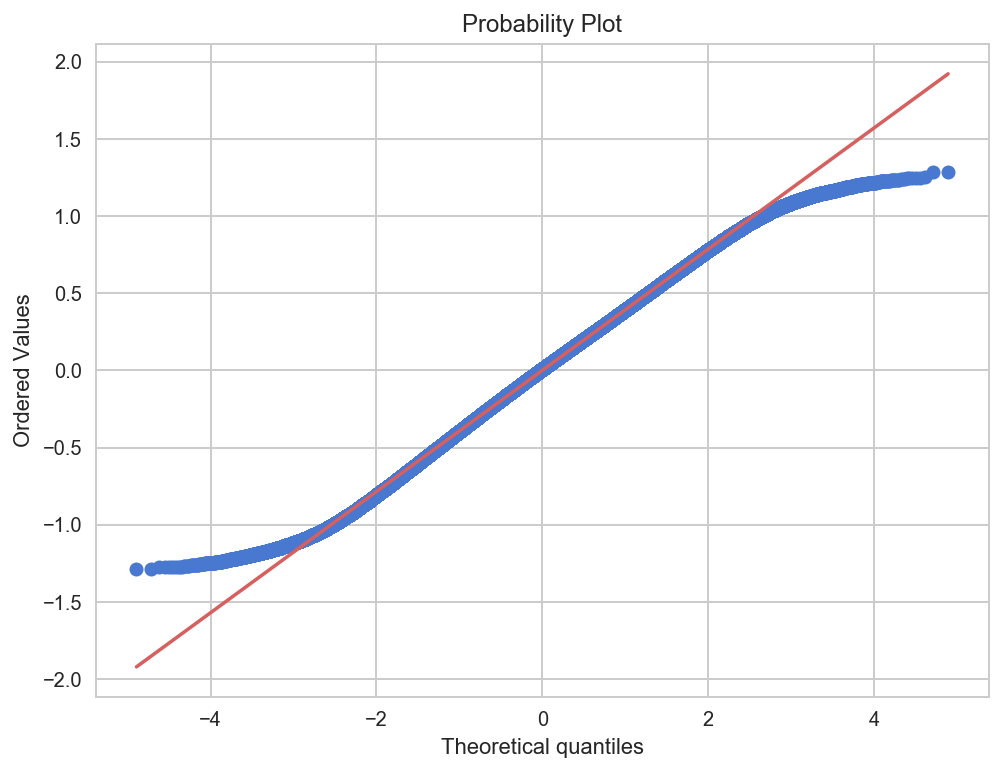

In [52]:
# probplot
f, ax = plt.subplots(figsize=(8, 6))
sp.stats.probplot(result2.resid, plot = plt)
plt.show()

### d. 이분산 검정

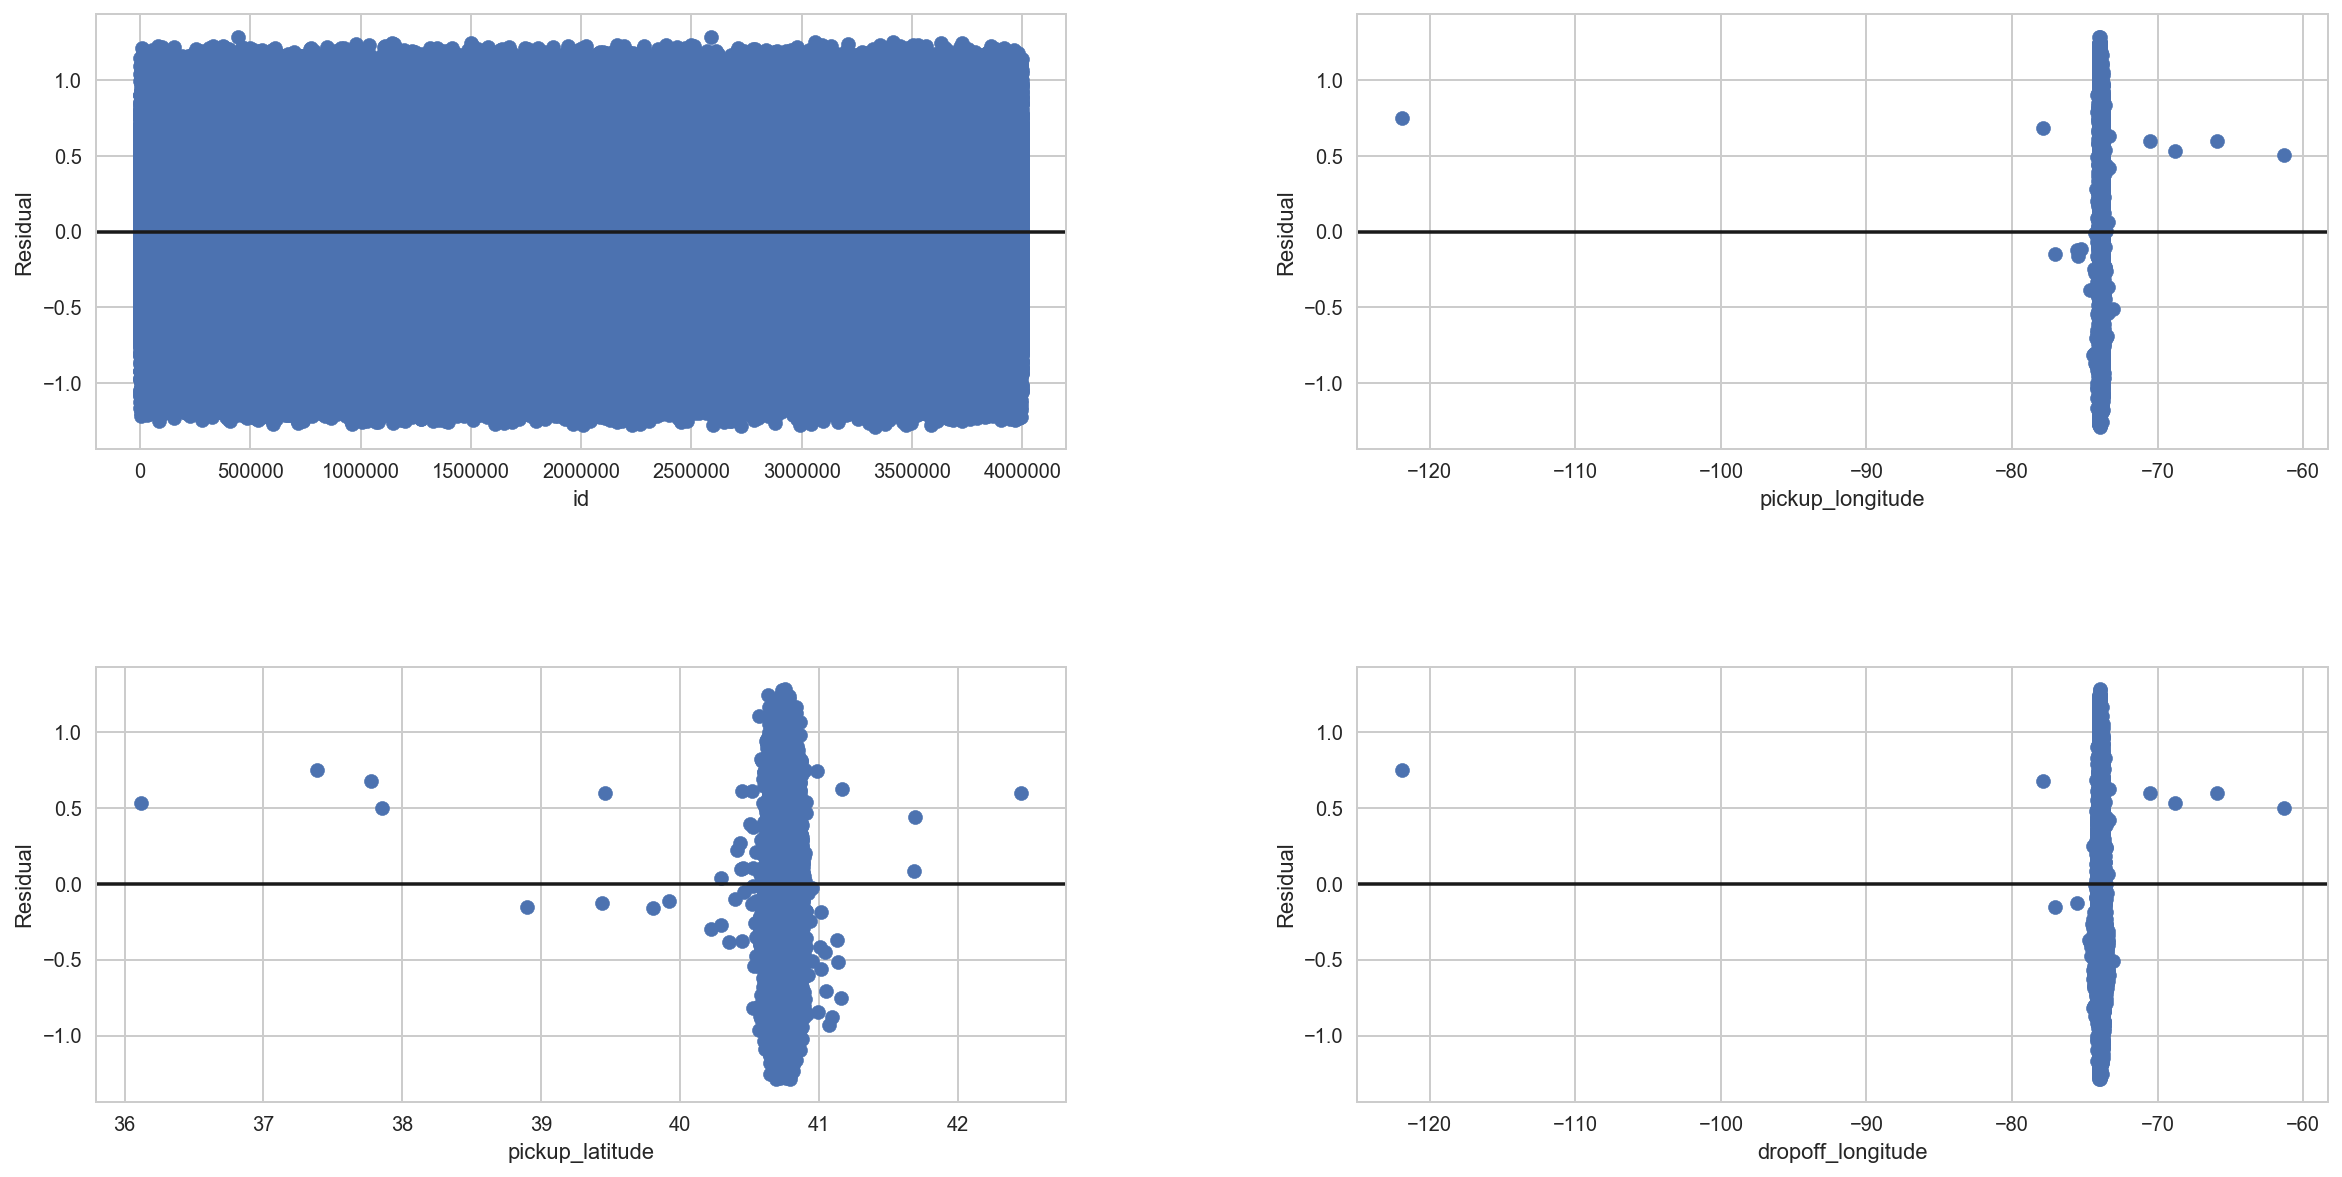

In [53]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i in range(1, 4+1):
    plt.subplot(2,2,i)
    plt.scatter(taxi_filtered[taxi_filtered.columns[i-1]], result2.resid)
    plt.axhline(y=0, c='k')
    plt.xlabel(taxi_filtered.columns[i-1])
    plt.ylabel("Residual")

plt.show()

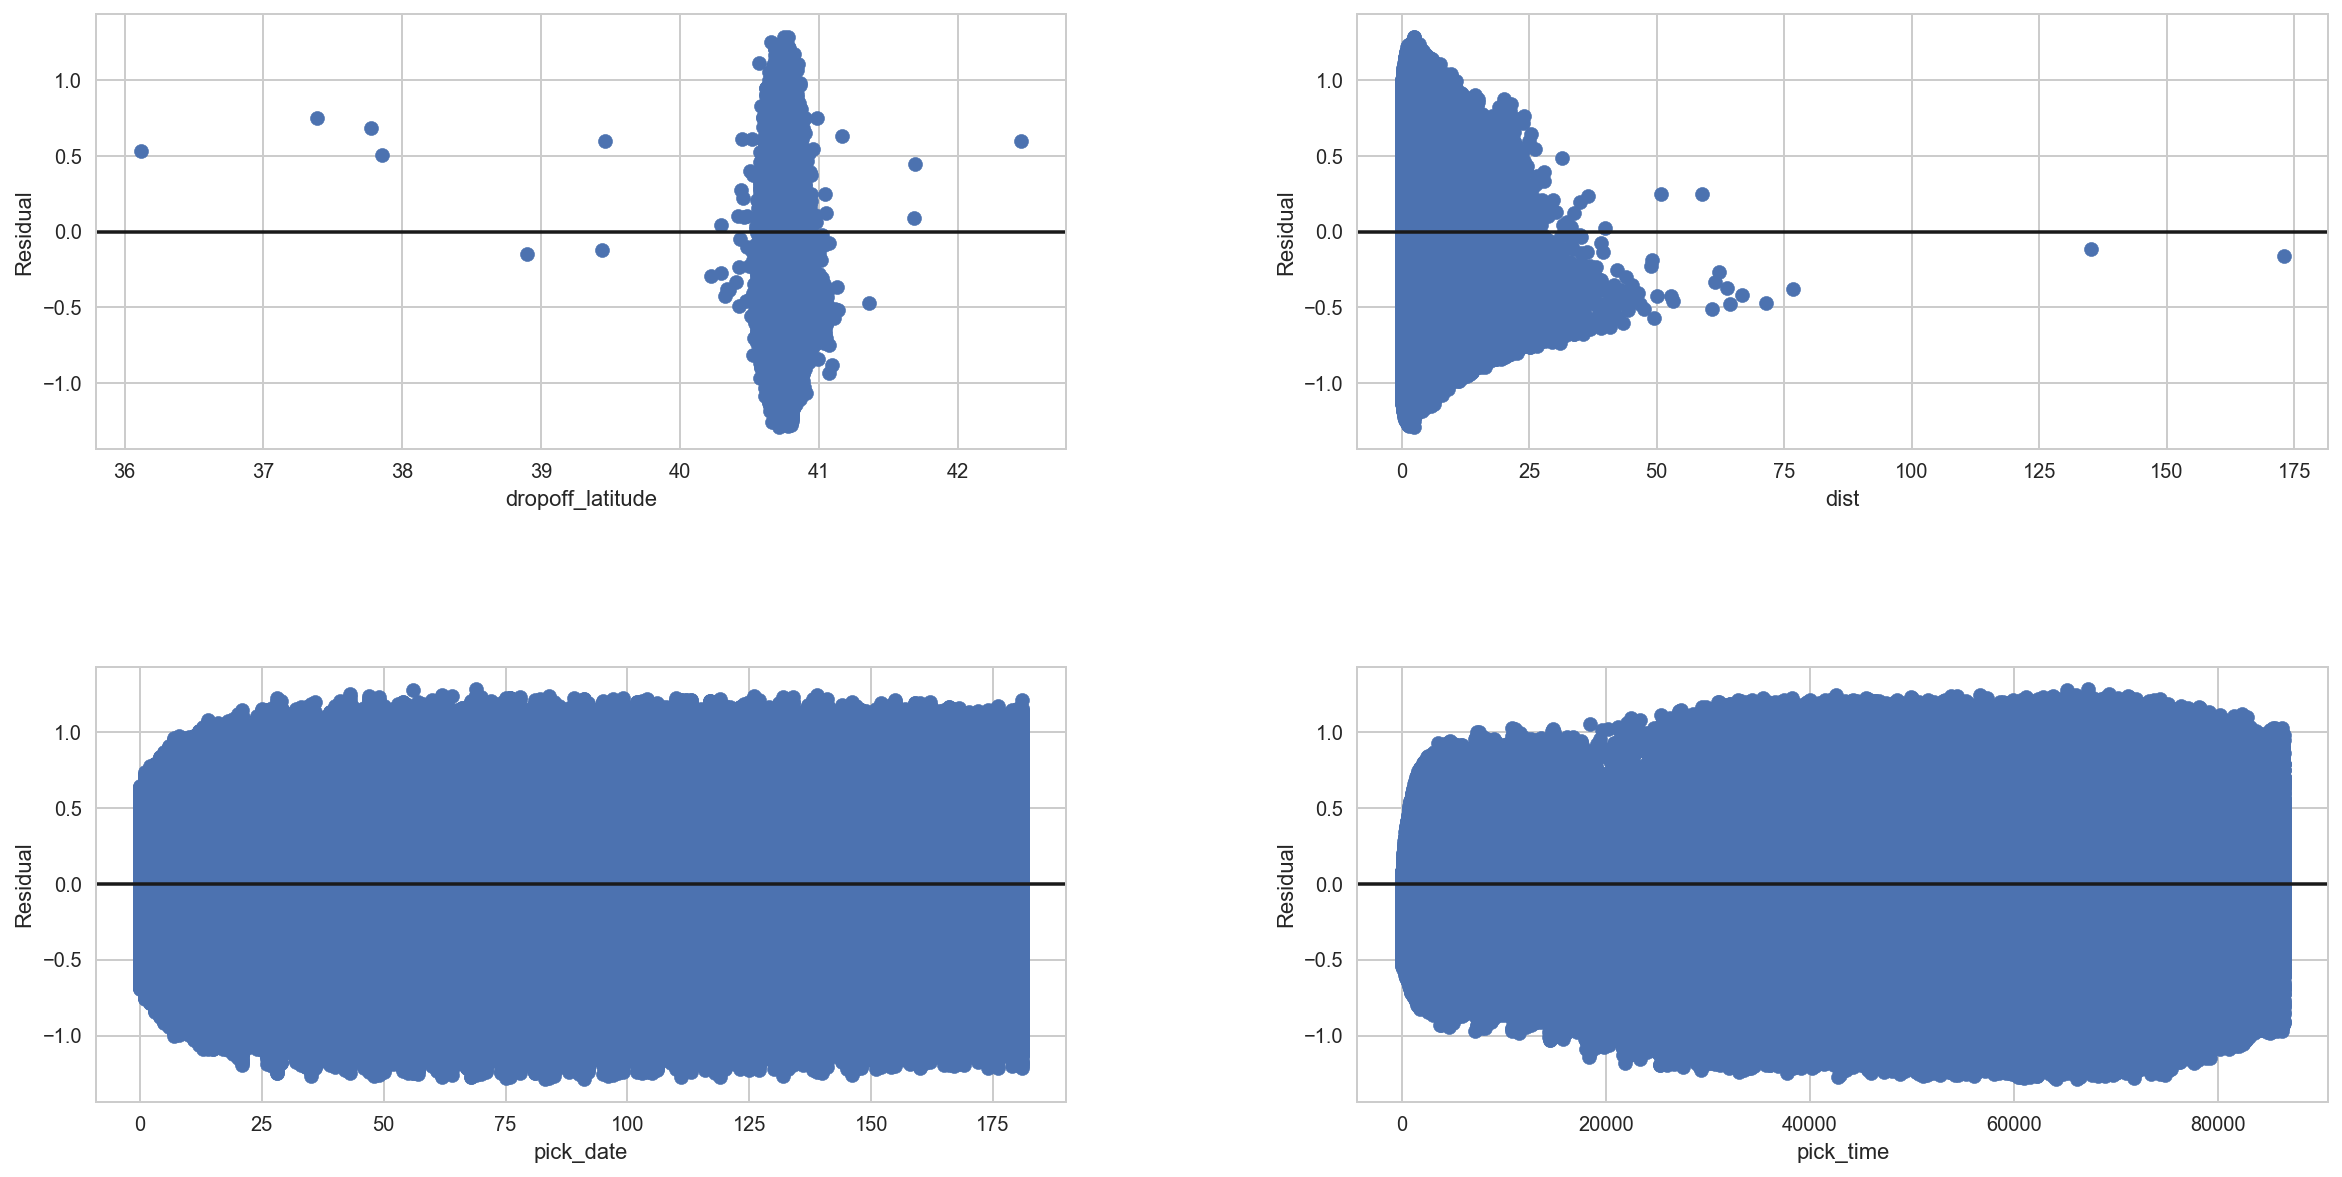

In [54]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i in range(5, 8+1):
    plt.subplot(2,2,i-4)
    plt.scatter(taxi_filtered[taxi_filtered.columns[i-1]], result2.resid)
    plt.axhline(y=0, c='k')
    plt.xlabel(taxi_filtered.columns[i-1])
    plt.ylabel("Residual")

plt.show()

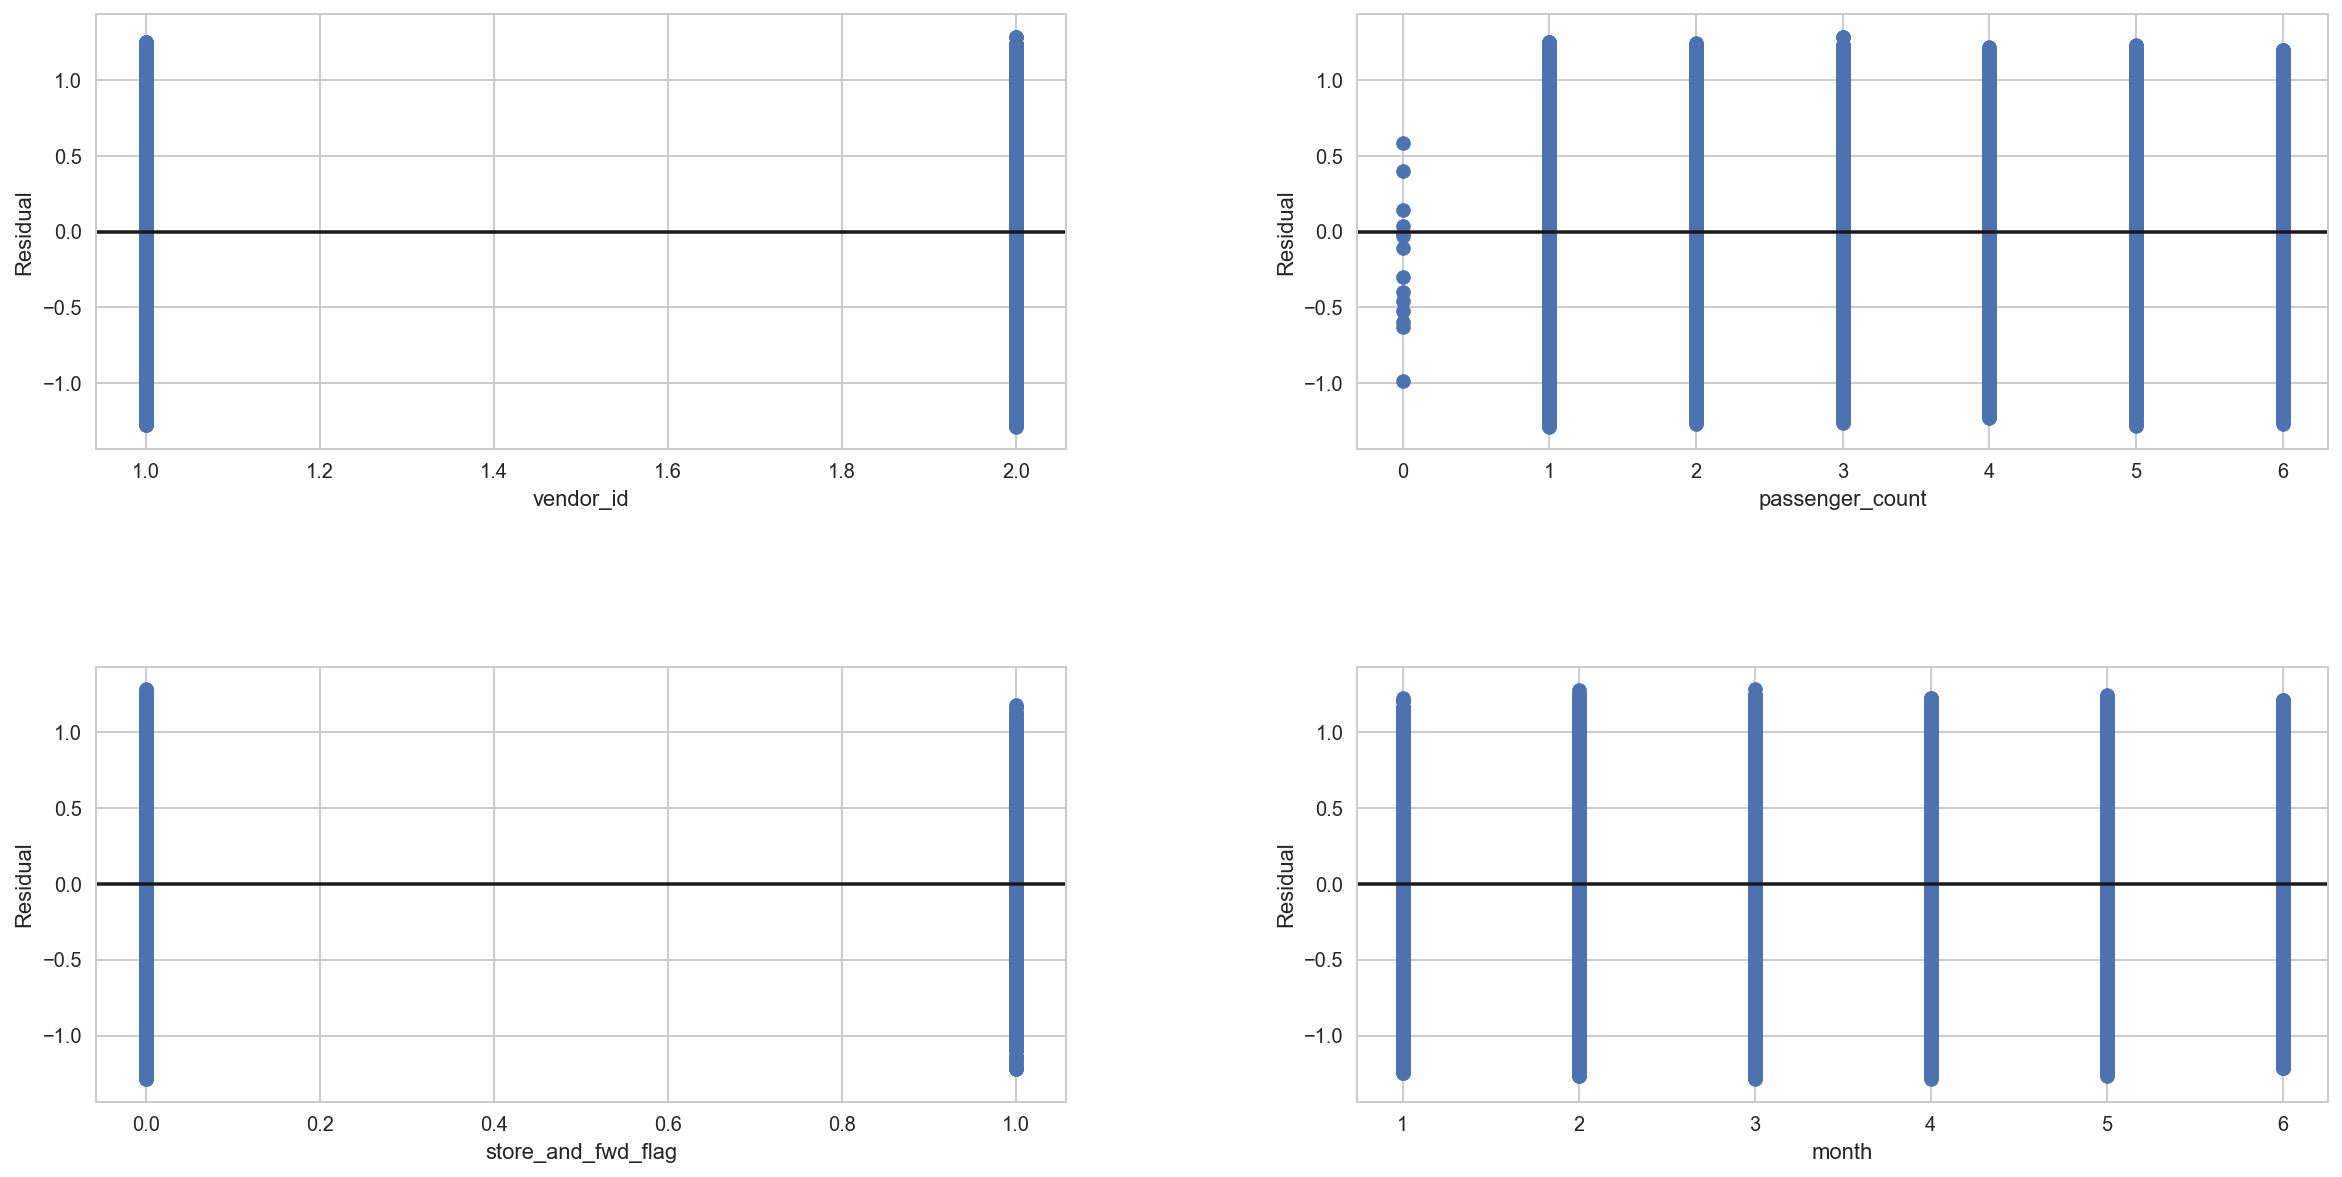

In [55]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i in range(9, 12+1):
    plt.subplot(2,2,i-8)
    plt.scatter(taxi_filtered[taxi_filtered.columns[i-1]], result2.resid)
    plt.axhline(y=0, c='k')
    plt.xlabel(taxi_filtered.columns[i-1])
    plt.ylabel("Residual")

plt.show()

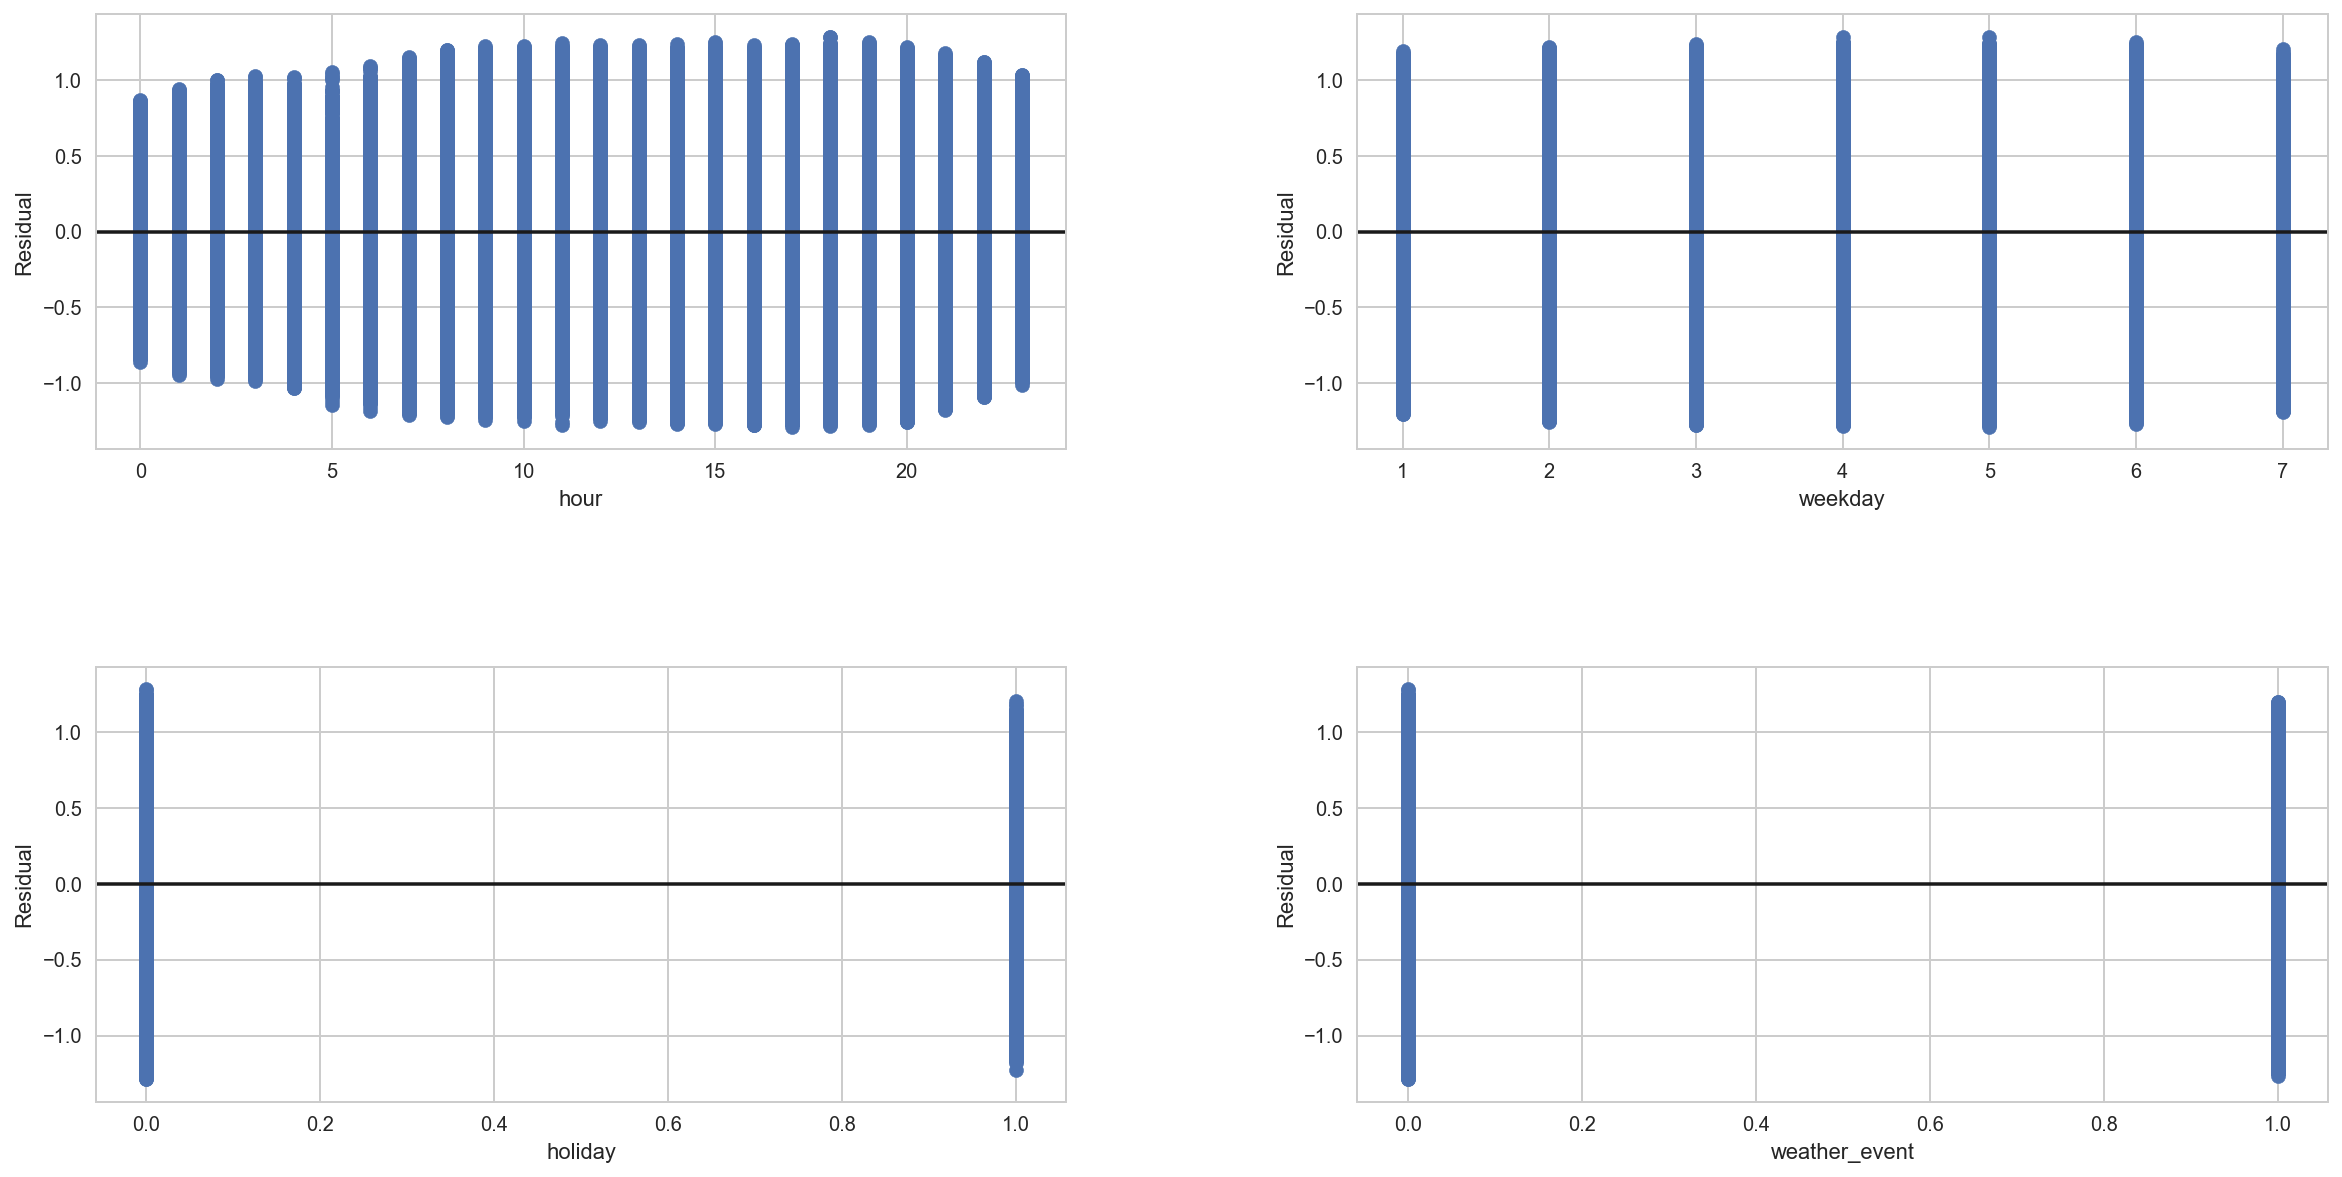

In [56]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i in range(13, 16+1):
    plt.subplot(2,2,i-12)
    plt.scatter(taxi_filtered[taxi_filtered.columns[i-1]], result2.resid)
    plt.axhline(y=0, c='k')
    plt.xlabel(taxi_filtered.columns[i-1])
    plt.ylabel("Residual")

plt.show()

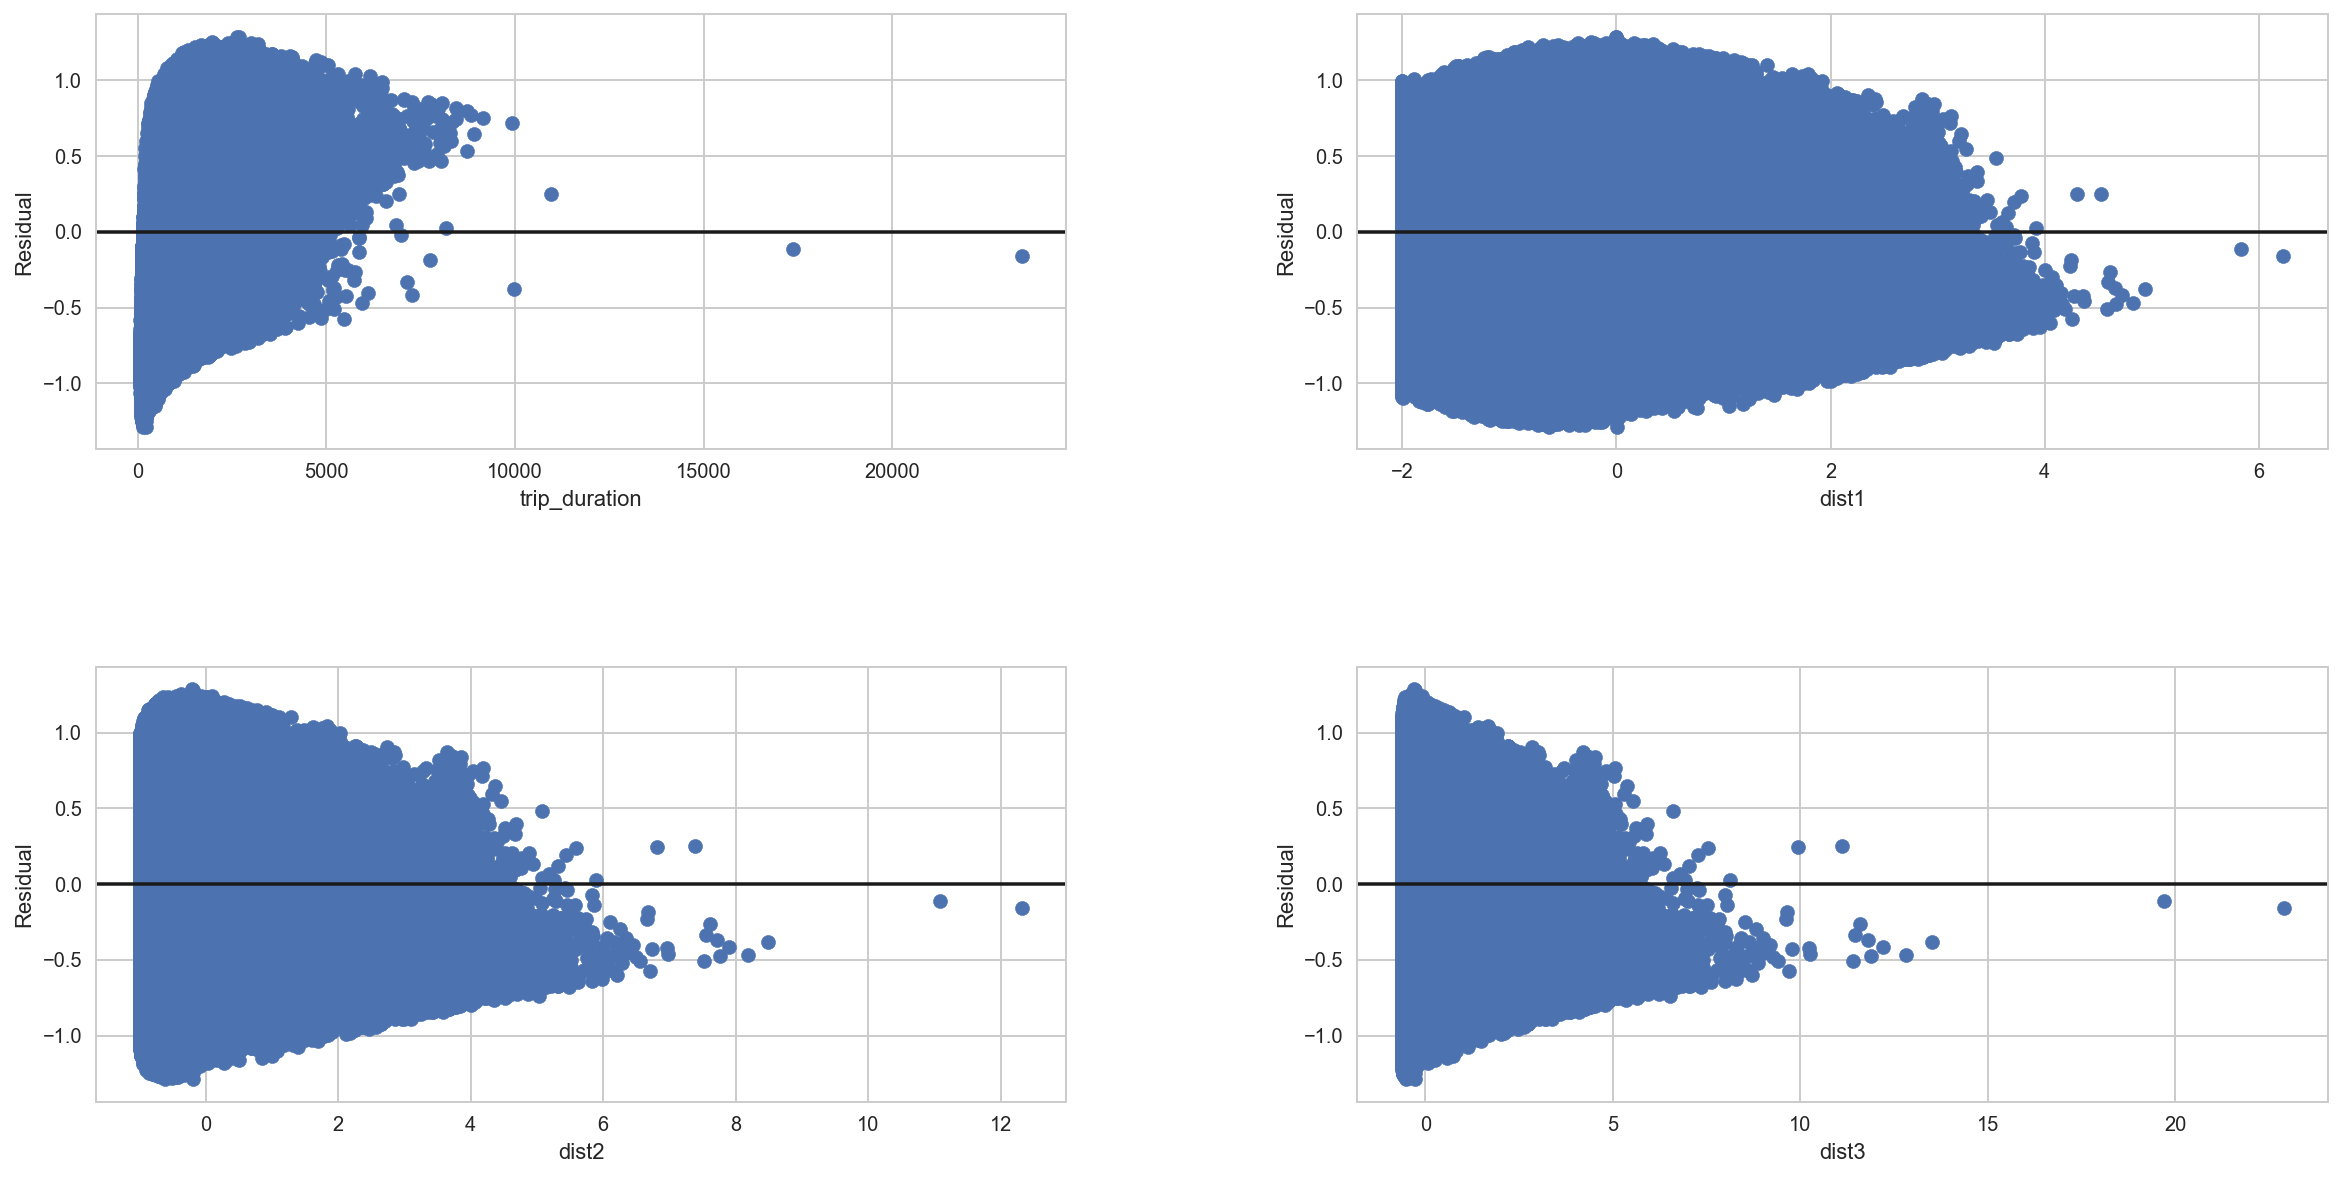

In [57]:
plt.figure(figsize=(20, 10))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)

for i in range(17, 20+1):
    plt.subplot(2,2,i-16)
    plt.scatter(taxi_filtered[taxi_fㅁiltered.columns[i-1]], result2.resid)
    plt.axhline(y=0, c='k')
    plt.xlabel(taxi_filtered.columns[i-1])
    plt.ylabel("Residual")

plt.show()

### e. 자기상관

In [58]:
durbin_watson(result2.wresid)

1.999054398965478

### f. Partial regression 

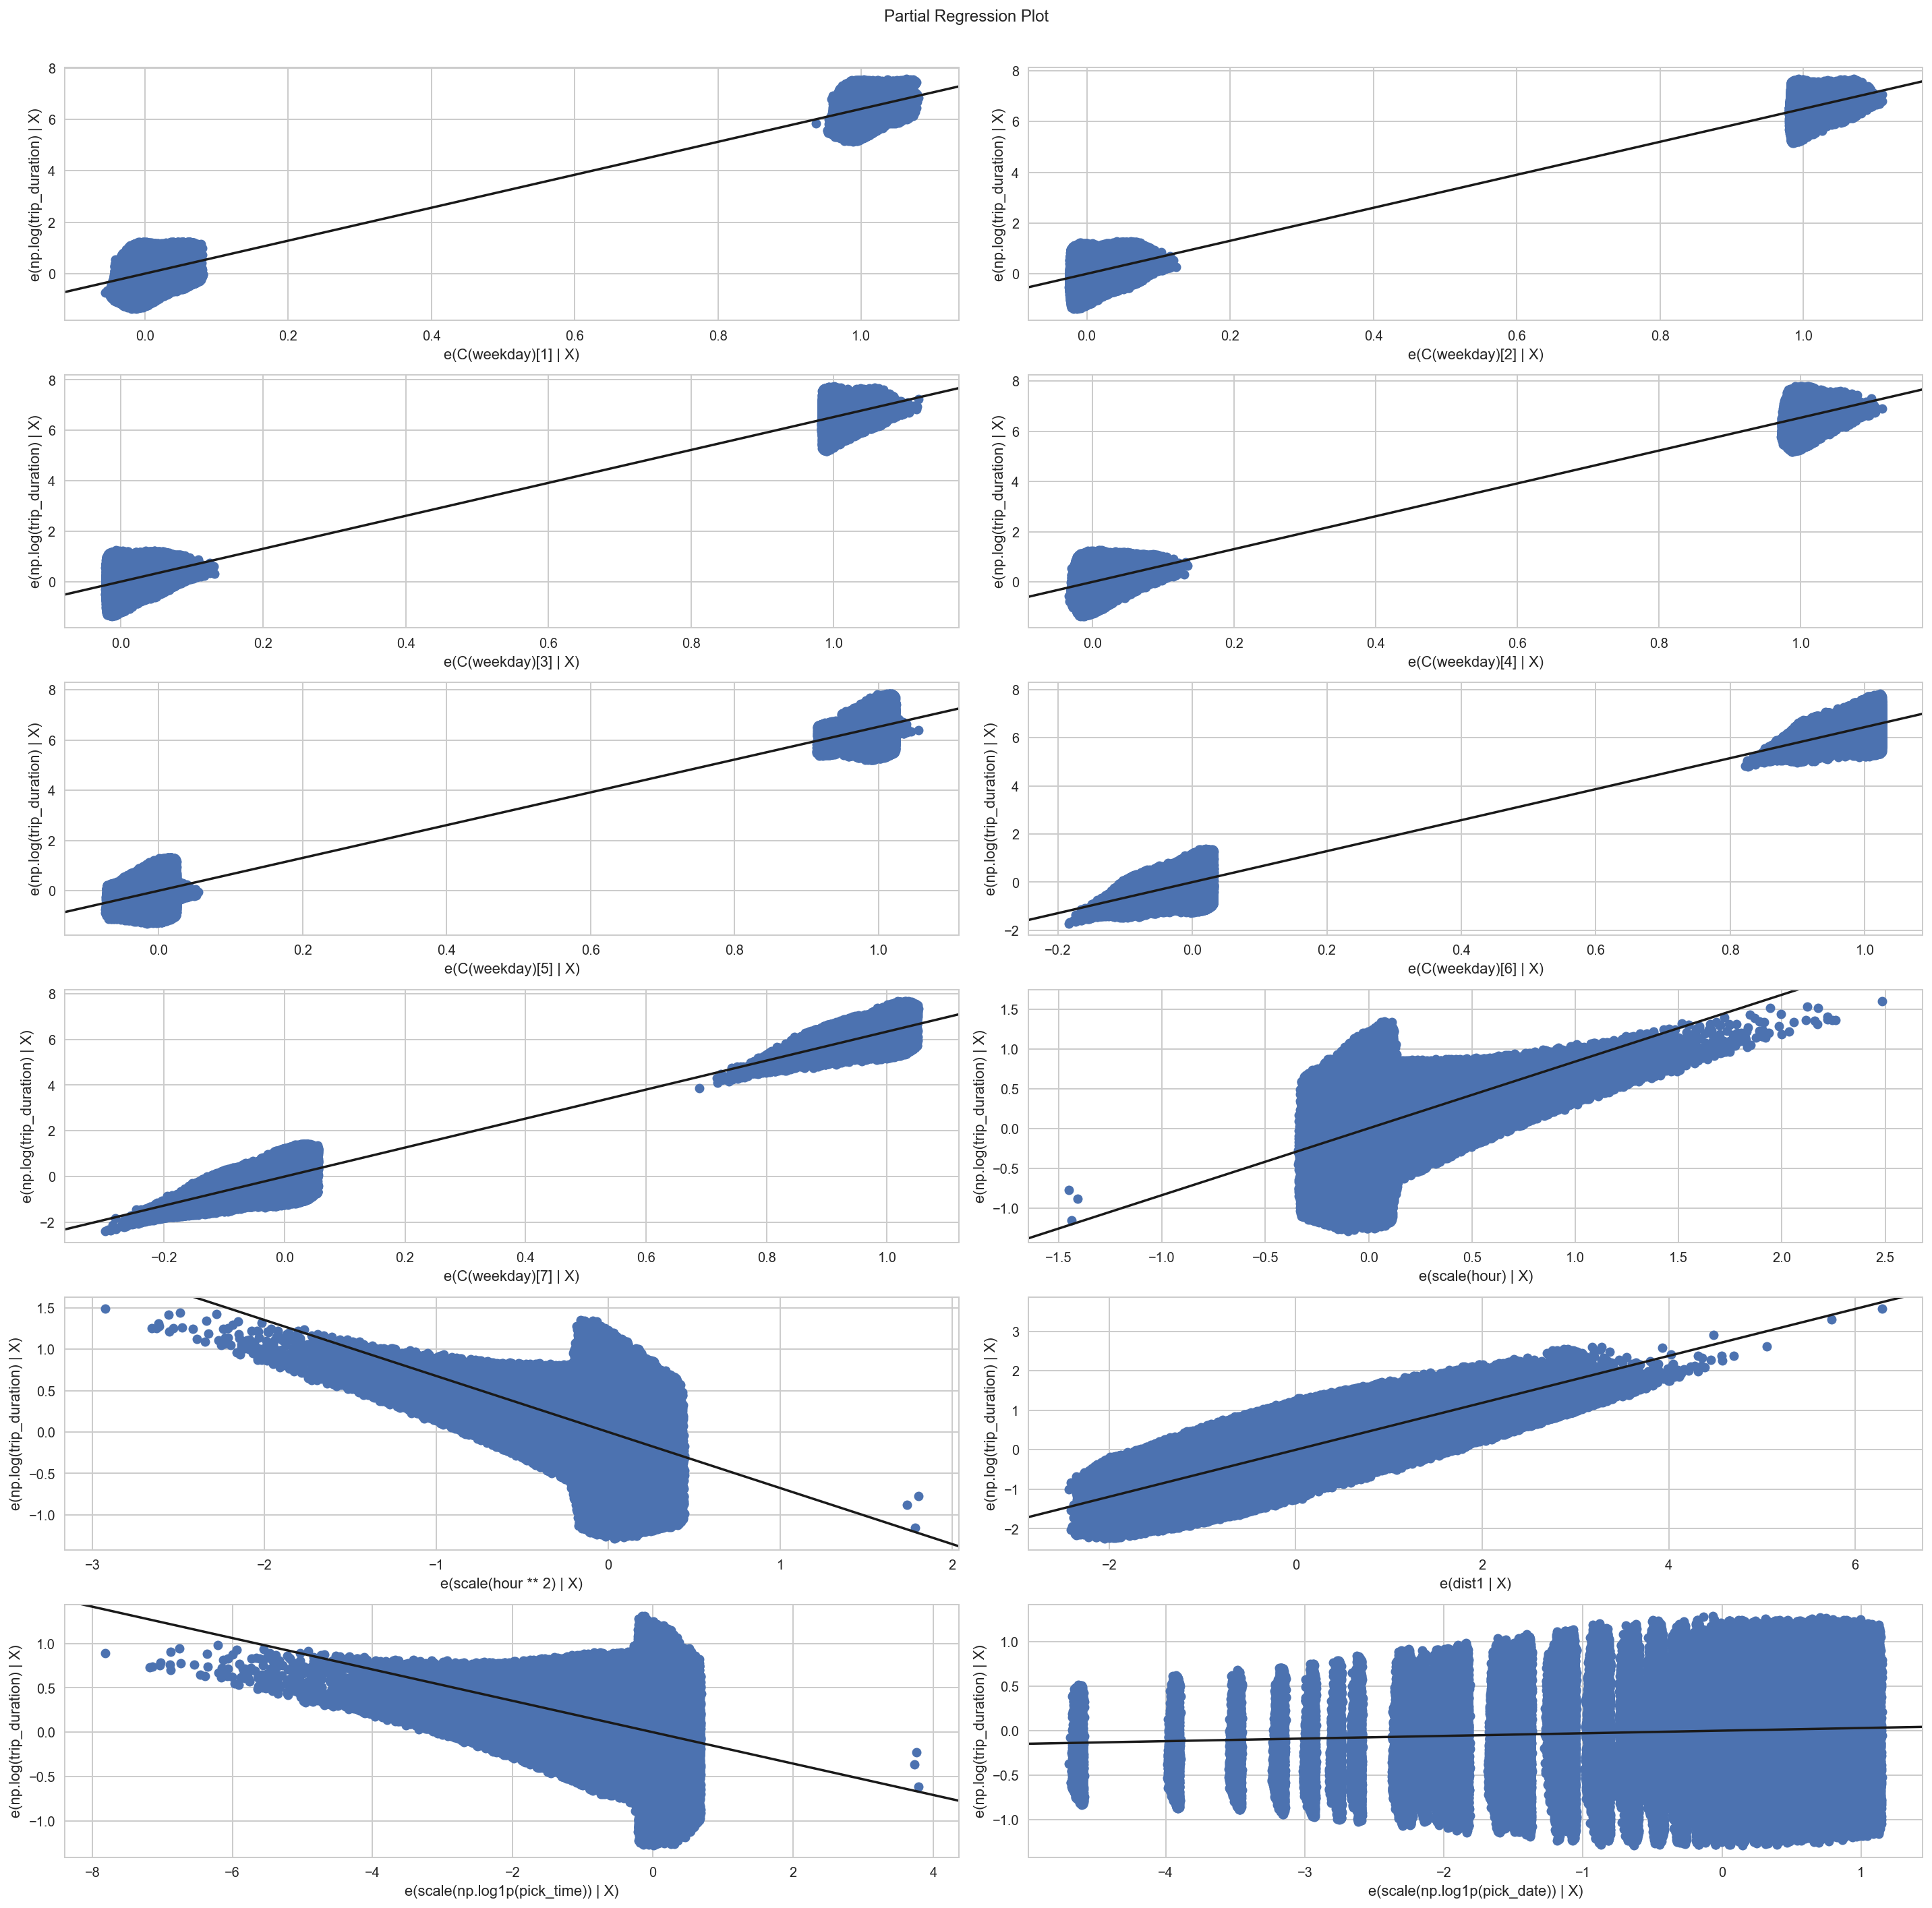

In [59]:
fig = plt.figure(figsize=(20, 20))
plt.subplots_adjust(wspace = 0.3, hspace = 0.5)
sm.graphics.plot_partregress_grid(result2, fig=fig)
plt.show()

---

# 5. Cross validation

Kaggle Score : RMSLE (Root Mean Squared Logarithmic Error)

$$\epsilon = \sqrt{\frac{1}{n} \sum_{i=1}^n (\log(p_i + 1) - \log(a_i+1))^2 }$$

## A. basic model

In [60]:
score, result_set = cross_validater("np.log(trip_duration) ~ scale(hour) + scale(hour**2) + C(weekday) + dist1 + scale(np.log1p(pick_time)) + scale(np.log1p(pick_date)) + 0", taxi, 5, r_seed=3, target_log=True)

In [61]:
result_set

R-square         AIC         BIC  Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.592 1741761.498 1741905.137    16.442         0.000        0.000   
1     0.592 1744747.986 1744891.624    16.451         0.000        0.000   
2     0.590 1747864.792 1748008.430    16.451         0.000        0.000   
3     0.592 1743052.662 1743196.300    16.476         0.000        0.000   
4     0.591 1745282.140 1745425.778    16.483         0.000        0.000   

   Pb(jb)  Dub-Wat                                            Remarks  
0   0.000    1.997  np.log(trip_duration) ~ scale(hour) + scale(ho...  
1   0.000    1.999  np.log(trip_duration) ~ scale(hour) + scale(ho...  
2   0.000    1.997  np.log(trip_duration) ~ scale(hour) + scale(ho...  
3   0.000    1.999  np.log(trip_duration) ~ scale(hour) + scale(ho...  
4   0.000    1.999  np.log(trip_duration) ~ scale(hour) + scale(ho...

In [62]:
score

[0.5098056618672709,
 0.507103937077391,
 0.5043528588371031,
 0.5085833920576293,
 0.5068158530111112]

## B. Outlier 1회 제거

In [67]:
result2 = sm.OLS.from_formula("np.log(trip_duration) ~ scale(hour) + scale(hour**2) + C(weekday) + dist1 + scale(np.log1p(pick_time)) + scale(np.log1p(pick_date)) + 0", data = taxi_filtered).fit()

In [68]:
score, result_set = cross_validater("np.log(trip_duration) ~  scale(hour) + scale(hour**2) + C(weekday) + dist1 + scale(np.log1p(pick_time)) + scale(np.log1p(pick_date)) + 0", taxi_filtered, 5, r_seed=3, target_log=True)

In [69]:
result_set

R-square         AIC         BIC  Cond.No.  Pb(Fstatics)  Pb(omnibus)  \
0     0.689 1091137.975 1091281.194    18.054         0.000        0.000   
1     0.688 1090918.947 1091062.166    18.083         0.000        0.000   
2     0.689 1090870.679 1091013.898    18.078         0.000        0.000   
3     0.688 1090515.440 1090658.659    18.079         0.000        0.000   
4     0.688 1092722.421 1092865.640    18.096         0.000        0.000   

   Pb(jb)  Dub-Wat                                            Remarks  
0   0.000    1.998  np.log(trip_duration) ~  scale(hour) + scale(h...  
1   0.000    1.999  np.log(trip_duration) ~  scale(hour) + scale(h...  
2   0.000    1.999  np.log(trip_duration) ~  scale(hour) + scale(h...  
3   0.000    1.998  np.log(trip_duration) ~  scale(hour) + scale(h...  
4   0.000    1.999  np.log(trip_duration) ~  scale(hour) + scale(h...

In [70]:
score

[0.39191175004482104,
 0.39205753281530853,
 0.39209058574209377,
 0.392337123809889,
 0.390800481624161]

## C. Outlier 2회 제거

---

# 6. Kaggle submit

## A. Submit

In [71]:
# data load
kaggle = pd.read_csv("test_kaggle.csv")

### a. Basic

In [72]:
# 테스트 데이터를 통해 y값 예측
y_hat = result1.predict(kaggle)
y_hat = y_hat.apply(lambda x: int(round(np.exp(x))))
ans = pd.concat([kaggle['id'], y_hat], axis=1)
ans.rename(columns={'id':'id' , 0:'trip_duration'}, inplace=True)
ans.tail()

id  trip_duration
625129  id3008929            368
625130  id3700764           1399
625131  id2568735           1849
625132  id1384355           5003
625133  id0621643           1722

In [73]:
# Kaggle 제출파일
ans.to_csv('basic_model.csv', index=False)

### b. Outlier 1회

In [75]:
# 테스트 데이터를 통해 y값 예측
y_hat = result2.predict(kaggle)
y_hat = y_hat.apply(lambda x: int(round(np.exp(x))))
ans = pd.concat([kaggle['id'], y_hat], axis=1)
ans.rename(columns={'id':'id' , 0:'trip_duration'}, inplace=True)
ans.tail()

id  trip_duration
625129  id3008929            447
625130  id3700764           1675
625131  id2568735           2234
625132  id1384355           6270
625133  id0621643           2258

In [76]:
# Kaggle 제출파일
ans.to_csv('wo_oulier.csv', index=False)

## B. 결과

### a. Basic model

- 0.53146 (only dist)
- 0.52769 (dist, pick_time)
- 0.52369 (dist, pick_time, weekday)
- 0.52284 (dist, pick_time, pick_date, weekday)
- **0.51219 (dist, pick_time, pick_date, weekday, hour) - 810/1257 (64%) **


### b. Outlier 1회

- 0.52699 (dist, weekday) - 824/1257 (65%)


### c. Outlier 2회

- 0.52724 (dist, weekday) - 824/1257 (65%)